Aluna: Danielle Victória Soares Eustáquio

Questão 1) No Pré-processamento foram utilizadas as seguintes técnicas: exclusão de dados faltantes, análise da existência de dados redundantes, exclusão de colunas com contextos redudantes, exclusão de coluna com dados inconsistentes, normalização por padronização e redução de dimensionalidade por agregação de dados.

Questão 2) Group -> Problema de classificação

Questão 3) Para a redução de dimensionalidade, foi feita a agregação de dados dos atributos height, weight e expectancy através da média aritméticas dos valores mínimos e máximos deles. Isso foi decidido ao analisar a correlação entre os valores mínimos e máximos e perceber que ela era alta ou muito alta.

Questão 4) Para os métodos supervisionados, foram utilizados: KNN, Random Forest, DecisionTree e Naive Bayes. Foi definido o tamanho do treino e teste, características, alvo, construção do modelo e a avaliação dele através da acurácia e matriz de confusão. Para a variação de parâmetro foi feito uso dos dados balanceados e desbalanceados e mudança do tamanho treino.

Questão 5) Para os métodos não supervisionados, foram utilizados: Kmeans e Hierárquico do Tipo Ligação Média com variações dos números de clusters para variação de parâmetro.

Questão 6) Para o supervisionado foram utilizadas as métricas de acurácia e matriz de confusão. Foi perceptível que antes da redução de dimensão, os desempenhos dos modelos balanceados demostram ser melhores. Entretanto, depois de reduzir a dimensão, os métodos não supervisionados demostram melhores resultados com os dados balanceados.



In [ ]:
#Bibliotecas utilizadas nesse projeto
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydot
import graphviz
import pydotplus
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans




#Leitura da base de dados
df = pd.read_csv("akc-data-latest.csv", sep = ',')
df

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


In [ ]:
#Processamento da base de dados

#Verificar se existem dados faltantes ou duplicados
#Exclusão de dado inconsistente -> Coluna "popularity"  -> Segundo o site (https://www.akc.org/),
#as posições de popularidade(2019 ou 2020, os únicos que possuem 195 posições como o visto na base
#de dados do gitHub) dos cachorros não está coerente com o apresentado na base de dados do gitHub
#Exclusão de linhas com dados faltantes

print('Valores faltantes: ', df.isnull().sum())

print("Valores Duplicados:\n", df.duplicated())

df = df.drop(columns=['popularity'])

df = df.dropna(how = 'any')


Valores faltantes:  Unnamed: 0                      0
description                     0
temperament                     1
popularity                     79
min_height                      0
max_height                      0
min_weight                      2
max_weight                      2
min_expectancy                  3
max_expectancy                  3
group                           0
grooming_frequency_value        7
grooming_frequency_category     7
shedding_value                 20
shedding_category              20
energy_level_value              6
energy_level_category           6
trainability_value             24
trainability_category          24
demeanor_value                 25
demeanor_category              25
dtype: int64
Valores Duplicados:
 0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Length: 277, dtype: bool


In [ ]:
#Exclusão de algumas colunas da base de dados
#Exclusão de description -> Apresenta dados redundantes em relação a outras colunas -> Na coluna
#"description" é mencionado o peso e a altura.
#Exclusão das colunas 'grooming_frequency_value', 'shedding_value', 'energy_level_value', 'trainability_value', 'demeanor_value' ->
#São dados equivalentes, logo, redudantes em relação às colunas 'grooming_frequency_category', 'shedding_category', 'energy_level_category',
#'trainability_category', 'demeanor_category'

df = df.drop(columns=['description', 'grooming_frequency_value', 'shedding_value', 'energy_level_value', 'trainability_value', 'demeanor_value'])


In [ ]:
#Transformação de dados -> Transformar dados nominais em numéricos
le = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = le.fit_transform(df[column])

In [ ]:
#Correlação dos Dados
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_category,shedding_category,energy_level_category,trainability_category,demeanor_category
Unnamed: 0,1.000000,0.032386,-0.216021,-0.182363,-0.172231,-0.154313,0.094025,0.090990,0.056704,0.099982,0.076753,0.069178,0.051080,-0.044362
temperament,0.032386,1.000000,0.042755,0.090076,0.061726,0.077691,0.058576,-0.017923,-0.112525,0.106773,0.031157,0.108243,0.027154,0.054486
min_height,-0.216021,0.042755,1.000000,0.931838,0.806923,0.793079,-0.465648,-0.472441,-0.079712,0.083729,0.189551,-0.134504,0.147762,-0.019469
max_height,-0.182363,0.090076,0.931838,1.000000,0.778869,0.804219,-0.442729,-0.472961,-0.136129,0.110975,0.206536,-0.166666,0.160086,0.029769
min_weight,-0.172231,0.061726,0.806923,0.778869,1.000000,0.946914,-0.555904,-0.573244,0.029108,0.033695,0.209670,-0.088367,0.117969,-0.017646
max_weight,-0.154313,0.077691,0.793079,0.804219,0.946914,1.000000,-0.532807,-0.547761,0.031940,0.020665,0.199052,-0.128650,0.074519,-0.018063
min_expectancy,0.094025,0.058576,-0.465648,-0.442729,-0.555904,-0.532807,1.000000,0.785717,-0.131360,-0.027308,-0.129042,0.030435,0.014100,0.049075
max_expectancy,0.090990,-0.017923,-0.472441,-0.472961,-0.573244,-0.547761,0.785717,1.000000,-0.069530,-0.039618,-0.226923,0.108116,-0.043912,-0.000292
group,0.056704,-0.112525,-0.079712,-0.136129,0.029108,0.031940,-0.131360,-0.069530,1.000000,-0.045123,-0.029245,0.137817,-0.164262,-0.155941
grooming_frequency_category,0.099982,0.106773,0.083729,0.110975,0.033695,0.020665,-0.027308,-0.039618,-0.045123,1.000000,0.085875,0.003656,-0.076263,-0.013838


In [ ]:
#Preparação para a Normalização  -> Separando o atributo alvo("group") base de dados
#para poder aplicar a normalização por padronização

df_semDim = df.copy()
group = []
group = df['group']


df_semDim = df_semDim.drop(columns=['group'])
df_semDim['group'] = group
df_semDim


,Unnamed: 0,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_category,shedding_category,energy_level_category,trainability_category,demeanor_category,group
0,0,72,22.86,29.21,3.175147,4.535924,12.0,15.0,0,4,4,2,3,7
1,1,90,63.50,68.58,22.679619,27.215542,12.0,15.0,1,1,2,4,1,2
2,2,114,58.42,58.42,22.679619,31.751466,11.0,14.0,0,2,4,1,2,6
3,3,84,60.96,71.12,31.751466,58.967008,10.0,13.0,1,4,2,1,0,8
4,4,29,58.42,63.50,34.019428,38.555351,10.0,14.0,0,4,2,3,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,230,150,54.61,63.50,20.411657,29.483504,12.0,14.0,2,4,2,0,0,5
273,231,48,48.26,63.50,12.700586,27.215542,12.0,15.0,2,4,2,3,0,0
274,232,174,25.40,58.42,4.535924,24.947580,13.0,18.0,2,1,2,0,0,4
275,233,21,53.34,58.42,18.143695,24.947580,10.0,12.0,4,4,2,4,4,0


Text(0, 0.5, 'Valores')

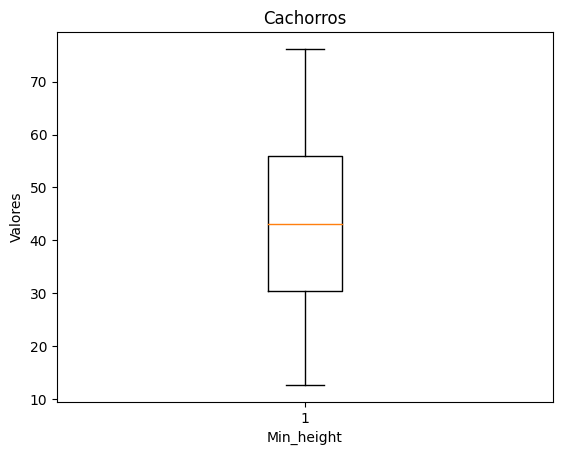

In [ ]:
#Boxplot -> Analisar a presença de outliers antes da normalização

plt.boxplot(df['min_height']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Min_height')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

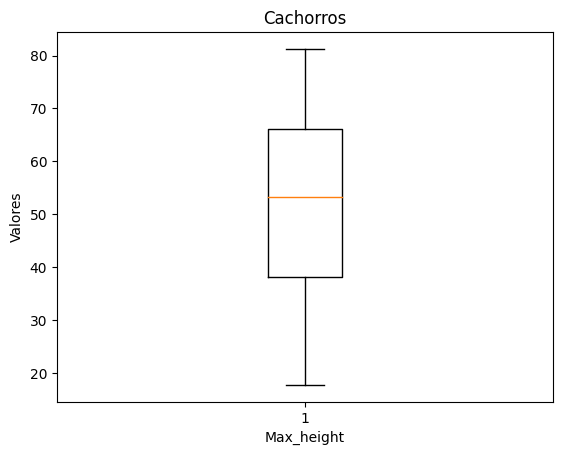

In [ ]:
#Boxplot -> Analisar a presença de outliers antes da normalização

plt.boxplot(df['max_height']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Max_height')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

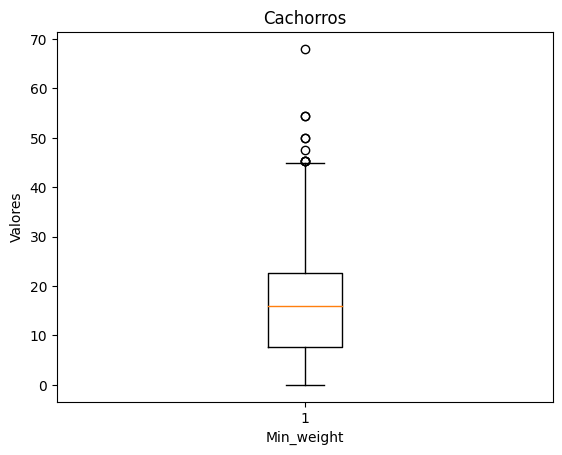

In [ ]:
#Boxplot -> Analisar a presença de outliers antes da normalização

plt.boxplot(df['min_weight']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Min_weight')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

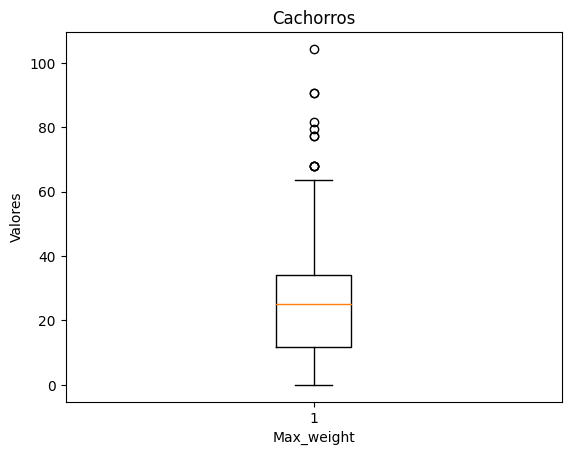

In [ ]:
#Boxplot -> Analisar a presença de outliers antes da normalização

plt.boxplot(df['max_weight']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Max_weight')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

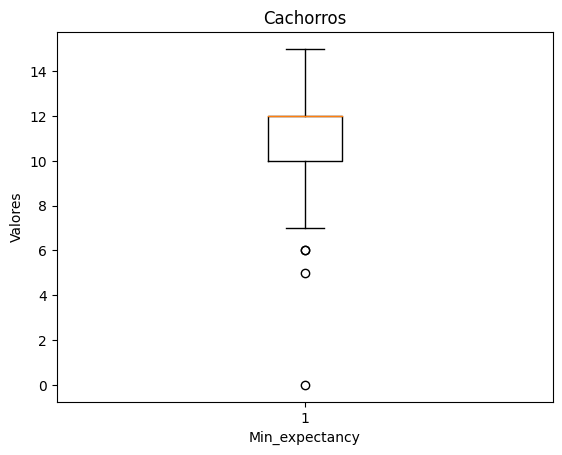

In [ ]:
#Boxplot -> Analisar a presença de outliers antes da normalização

plt.boxplot(df['min_expectancy']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Min_expectancy')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

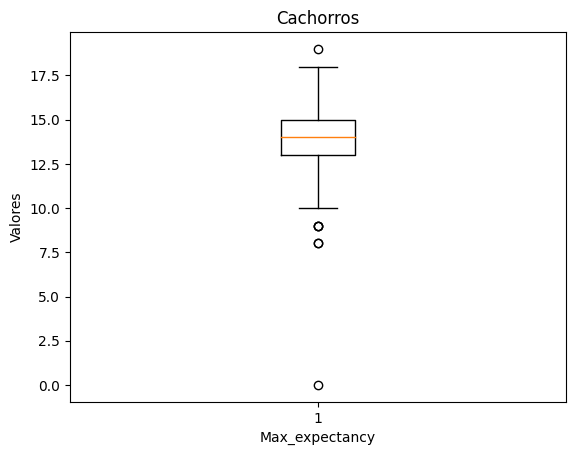

In [ ]:
#Boxplot -> Analisar a presença de outliers antes da normalização

plt.boxplot(df['max_expectancy']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Max_expectancy')
plt.ylabel('Valores')

In [ ]:
#Normalização -> Padronização -> Manual

#Xchanged = X - Média/DesvioPadrão

normalizado_Padronizacao = pd.DataFrame(columns = ['Unnamed: 0', 'temperament', "min_height", "max_height",	"min_weight",	"max_weight", "min_expectancy",
                                         "max_expectancy", "grooming_frequency_category", "shedding_category",	"energy_level_category",
                                         "demeanor_category", "trainability_category"])
print(normalizado_Padronizacao.columns)

coluna = []
coluna_normalizada = []
coluna = df_semDim['Unnamed: 0']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('Unnamed: 0')
print(v_mean)
print(v_std)
for i in df_semDim['Unnamed: 0']:
    coluna_normalizada = (df_semDim['Unnamed: 0'] - v_mean) / (v_std)


normalizado_Padronizacao['Unnamed: 0'] = coluna_normalizada

coluna = []
coluna_normalizada = []
coluna = df_semDim['temperament']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('temperament')
print(v_mean)
print(v_std)
for i in df_semDim['temperament']:
    coluna_normalizada = (df_semDim['temperament'] - v_mean) / (v_std)


normalizado_Padronizacao['temperament'] = coluna_normalizada

coluna = []
coluna_normalizada = []
coluna = df_semDim['min_height']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('min_height')
print(v_mean)
print(v_std)
for i in df_semDim['min_height']:
    coluna_normalizada = (df_semDim['min_height'] - v_mean) / (v_std)


normalizado_Padronizacao['min_height'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['max_height']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('max_height')
print(v_mean)
print(v_std)
for i in df_semDim['max_height']:
    coluna_normalizada = (df_semDim['max_height'] - v_mean) / (v_std)



normalizado_Padronizacao['max_height'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['min_weight']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('min_weight')
print(v_mean)
print(v_std)
for i in df_semDim['min_weight']:
    coluna_normalizada = (df_semDim['min_weight'] - v_mean) / (v_std)



normalizado_Padronizacao['min_weight'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['max_weight']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('max_weight')
print(v_mean)
print(v_std)
for i in df_semDim['max_weight']:
    coluna_normalizada = (df_semDim['max_weight'] - v_mean) / (v_std)



normalizado_Padronizacao['max_weight'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['min_expectancy']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('min_expectancy')
print(v_mean)
print(v_std)
for i in df_semDim['min_expectancy']:
    coluna_normalizada = (df_semDim['min_expectancy'] - v_mean) / (v_std)



normalizado_Padronizacao['min_expectancy'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['max_expectancy']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('max_expectancy')
print(v_mean)
print(v_std)
for i in df_semDim['max_expectancy']:
    coluna_normalizada = (df_semDim['max_expectancy'] - v_mean) / (v_std)



normalizado_Padronizacao['max_expectancy'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['trainability_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('trainability_category')
print(v_mean)
print(v_std)
for i in df_semDim['trainability_category']:
    coluna_normalizada = (df_semDim['trainability_category'] - v_mean) / (v_std)



normalizado_Padronizacao['trainability_category'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['grooming_frequency_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('grooming_frequency_category')
print(v_mean)
print(v_std)
for i in df_semDim['grooming_frequency_category']:
    coluna_normalizada = (df_semDim['grooming_frequency_category'] - v_mean) / (v_std)


normalizado_Padronizacao['grooming_frequency_category'] = coluna_normalizada

coluna = []
coluna_normalizada = []
coluna = df_semDim['shedding_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('shedding_category')
print(v_mean)
print(v_std)
for i in df_semDim['shedding_category']:
    coluna_normalizada = (df_semDim['shedding_category'] - v_mean) / (v_std)




normalizado_Padronizacao['shedding_category'] = coluna_normalizada

coluna = []
coluna_normalizada = []
coluna = df_semDim['energy_level_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('energy_level_category')
print(v_mean)
print(v_std)
for i in df_semDim['energy_level_category']:
    coluna_normalizada = (df_semDim['energy_level_category'] - v_mean) / (v_std)



normalizado_Padronizacao['energy_level_category'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df_semDim['demeanor_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('demeanor_category')
print(v_mean)
print(v_std)
for i in df_semDim['demeanor_category']:
    coluna_normalizada = (df_semDim['demeanor_category'] - v_mean) / (v_std)



normalizado_Padronizacao['demeanor_category'] = coluna_normalizada


normalizado_Padronizacao



Index(['Unnamed: 0', 'temperament', 'min_height', 'max_height', 'min_weight',
       'max_weight', 'min_expectancy', 'max_expectancy',
       'grooming_frequency_category', 'shedding_category',
       'energy_level_category', 'demeanor_category', 'trainability_category'],
      dtype='object')
Unnamed: 0
117.0
67.98284097231203
temperament
115.70212765957447
67.07296540157898
min_height
43.26971063829788
14.4543782788722
max_height
51.64252340425532
16.15910550946131
min_weight
17.18825555255319
12.001506342281482
max_weight
26.397145753702127
18.41349282085246
min_expectancy
11.323404255319149
1.8552550410935913
max_expectancy
13.842553191489362
2.0725871236160587
trainability_category
1.6127659574468085
1.3771047637925313
grooming_frequency_category
2.4553191489361703
1.5693115304999057
shedding_category
2.8595744680851065
1.2375291716268295
energy_level_category
2.9957446808510637
1.0840643385376658
demeanor_category
2.1021276595744682
1.5601185252067282


,Unnamed: 0,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_category,shedding_category,energy_level_category,demeanor_category,trainability_category
0,-1.721023,-0.651561,-1.412009,-1.388228,-1.167613,-1.187239,0.364692,0.558455,-1.564584,0.921534,0.926380,0.575515,0.281194
1,-1.706313,-0.383197,1.399596,1.048169,0.457556,0.044445,0.364692,0.558455,-0.927362,-1.502651,-0.918529,-0.706438,1.733517
2,-1.691603,-0.025377,1.048145,0.419422,0.457556,0.290782,-0.174318,0.075966,-1.564584,-0.694589,0.926380,-0.065461,-0.444967
3,-1.676894,-0.472651,1.223871,1.205356,1.213449,1.768804,-0.713327,-0.406522,-0.927362,0.921534,-0.918529,-1.347415,-0.444967
4,-1.662184,-1.292654,1.048145,0.733795,1.402422,0.660288,-0.713327,0.075966,-1.564584,0.921534,-0.918529,-0.065461,1.007355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.662184,0.511352,0.784557,0.733795,0.268583,0.167614,0.364692,0.075966,-0.290139,0.921534,-0.918529,-1.347415,-1.171128
273,1.676894,-1.009380,0.345244,0.733795,-0.373925,0.044445,0.364692,0.558455,-0.290139,0.921534,-0.918529,-1.347415,1.007355
274,1.691603,0.869171,-1.236284,0.419422,-1.054229,-0.078723,0.903701,2.005921,-0.290139,-1.502651,-0.918529,-1.347415,-1.171128
275,1.706313,-1.411927,0.696695,0.419422,0.079610,-0.078723,-0.713327,-0.889011,0.984305,0.921534,-0.918529,1.216492,1.733517


Text(0, 0.5, 'Valores')

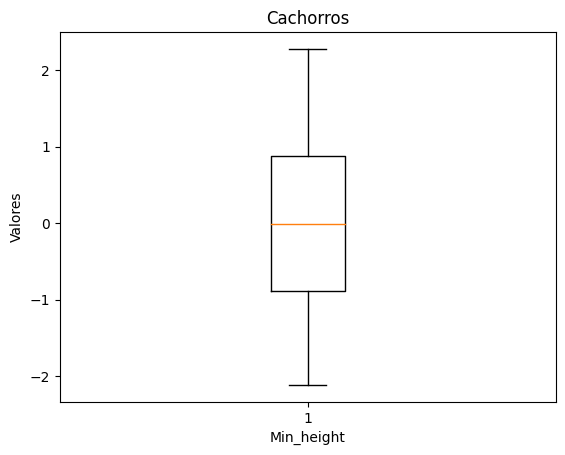

In [ ]:
#Como estratégia para amenizar a presença dos outliers foi aplicada a normalização, mas
#aparentemente não houve uma melhora de fato.

#Boxplot -> Analisar a presença de outliers após a aplicação da normalização por padronização

plt.boxplot(normalizado_Padronizacao['min_height']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Min_height')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

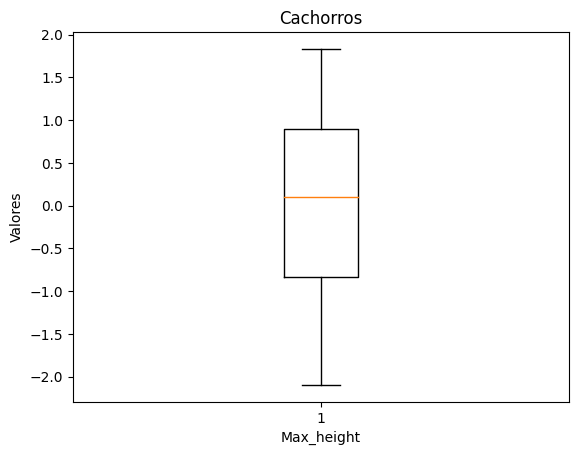

In [ ]:
#Boxplot -> Analisar a presença de outliers após a aplicação da normalização por padronização

plt.boxplot(normalizado_Padronizacao['max_height']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Max_height')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

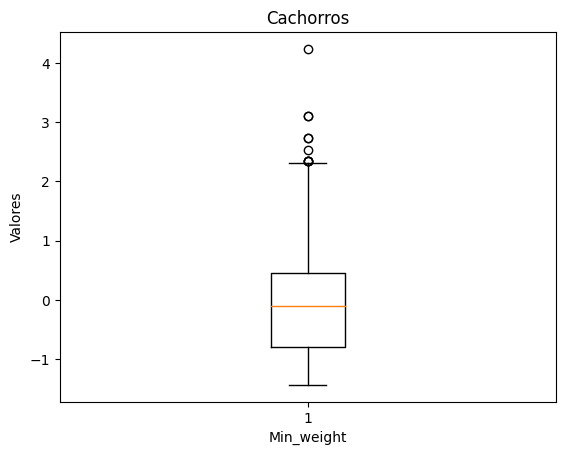

In [ ]:
#Boxplot -> Analisar a presença de outliers após a aplicação da normalização por padronização

plt.boxplot(normalizado_Padronizacao['min_weight']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Min_weight')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

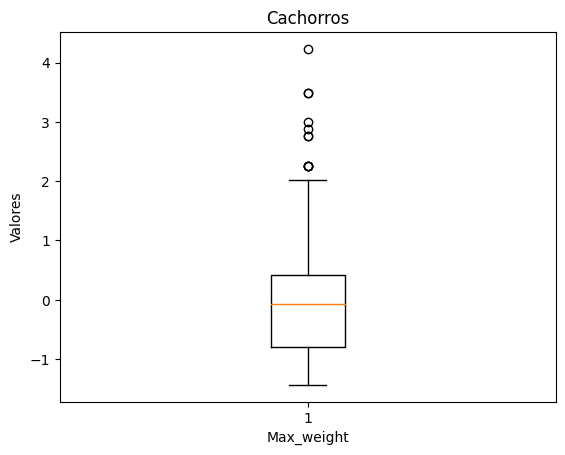

In [ ]:
#Boxplot -> Analisar a presença de outliers após a aplicação da normalização por padronização

plt.boxplot(normalizado_Padronizacao['max_weight']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Max_weight')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

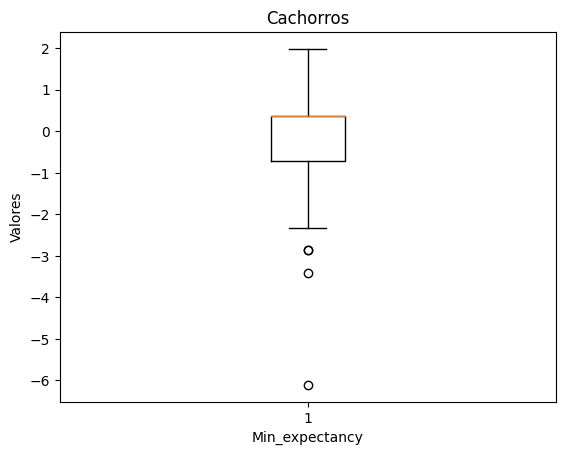

In [ ]:
#Boxplot -> Analisar a presença de outliers após a aplicação da normalização por padronização

plt.boxplot(normalizado_Padronizacao['min_expectancy']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Min_expectancy')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

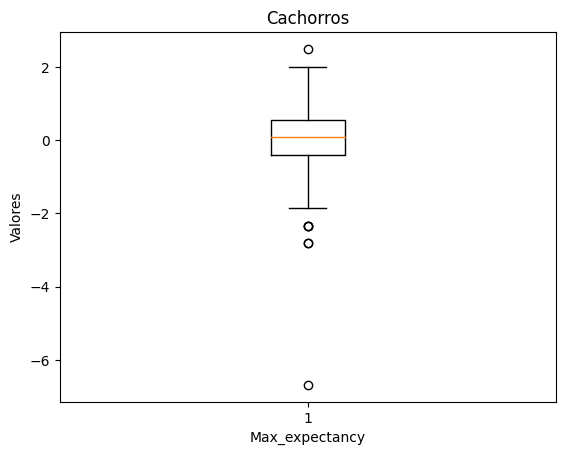

In [ ]:
#Boxplot -> Analisar a presença de outliers após a aplicação da normalização por padronização

plt.boxplot(normalizado_Padronizacao['max_expectancy']) #gráfico de boxplot

plt.title('Cachorros')
plt.xlabel('Max_expectancy')
plt.ylabel('Valores')

In [ ]:
#Balanceamento de dados -> Sem Redução de Dimensionalidade

#Inserir novamente a coluna alvo("group") na base de dados após a normalização
normalizado_Padronizacao['group'] = group
quantidade = normalizado_Padronizacao['group'].value_counts() #cálculo das quantidades dos tipos do atributo group
print(quantidade)
x = (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 3].sample(n=9, random_state =2)).copy()
y = pd.DataFrame()

#Construção de uma nova base de dados -> Dados balanceados
y = pd.concat([(normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 0].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 1].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 2].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 3].sample(n=9, random_state =2)),
               x,
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 4].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 5].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 6].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 7].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 8].sample(n=18, random_state =2))
               ])

y


0    38
2    32
1    30
8    29
5    29
6    27
7    21
4    20
3     9
Name: group, dtype: int64


,Unnamed: 0,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_category,shedding_category,energy_level_category,demeanor_category,trainability_category,group
84,-0.632513,0.839353,-0.181932,-0.052139,-0.336131,-0.349694,0.903701,0.075966,-0.290139,-0.694589,0.003925,1.216492,-0.444967,0
5,-1.647475,1.212081,0.520969,0.733795,0.835502,1.029793,-0.713327,-0.889011,-0.290139,0.921534,-0.918529,-1.347415,-1.171128,0
249,1.382702,1.465536,-0.181932,-0.052139,-0.298336,-0.325060,0.364692,0.075966,0.984305,0.921534,0.926380,-1.347415,1.733517,0
96,-0.500126,0.958626,-0.884833,-0.838074,-0.109363,-0.448228,1.981720,0.558455,-0.290139,-0.694589,0.926380,-1.347415,1.733517,0
105,-0.382449,-0.696288,0.345244,0.576608,0.079610,0.290782,0.364692,1.040944,-1.564584,0.921534,0.926380,1.216492,-1.171128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,-1.206187,0.749898,1.575321,1.519730,1.591395,1.768804,-0.713327,-0.889011,-0.927362,0.921534,-0.918529,1.216492,0.281194,8
92,-0.544255,0.973535,1.223871,1.205356,0.835502,1.029793,-0.713327,-0.889011,-0.290139,0.113473,0.003925,-1.347415,-0.444967,8
43,-1.147348,-0.621743,0.872420,1.048169,4.237018,3.493163,-1.252337,-1.371500,-0.290139,-0.694589,-2.763438,1.216492,-1.171128,8
173,0.485417,1.689173,1.575321,1.205356,2.347287,2.261478,-1.252337,-1.853989,0.984305,0.921534,0.926380,-0.065461,0.281194,8


In [ ]:
#Separando as características do alvo("group")
features = y.drop(['group'], axis=1)

targets = y['group']

features

,Unnamed: 0,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_category,shedding_category,energy_level_category,demeanor_category,trainability_category
84,-0.632513,0.839353,-0.181932,-0.052139,-0.336131,-0.349694,0.903701,0.075966,-0.290139,-0.694589,0.003925,1.216492,-0.444967
5,-1.647475,1.212081,0.520969,0.733795,0.835502,1.029793,-0.713327,-0.889011,-0.290139,0.921534,-0.918529,-1.347415,-1.171128
249,1.382702,1.465536,-0.181932,-0.052139,-0.298336,-0.325060,0.364692,0.075966,0.984305,0.921534,0.926380,-1.347415,1.733517
96,-0.500126,0.958626,-0.884833,-0.838074,-0.109363,-0.448228,1.981720,0.558455,-0.290139,-0.694589,0.926380,-1.347415,1.733517
105,-0.382449,-0.696288,0.345244,0.576608,0.079610,0.290782,0.364692,1.040944,-1.564584,0.921534,0.926380,1.216492,-1.171128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,-1.206187,0.749898,1.575321,1.519730,1.591395,1.768804,-0.713327,-0.889011,-0.927362,0.921534,-0.918529,1.216492,0.281194
92,-0.544255,0.973535,1.223871,1.205356,0.835502,1.029793,-0.713327,-0.889011,-0.290139,0.113473,0.003925,-1.347415,-0.444967
43,-1.147348,-0.621743,0.872420,1.048169,4.237018,3.493163,-1.252337,-1.371500,-0.290139,-0.694589,-2.763438,1.216492,-1.171128
173,0.485417,1.689173,1.575321,1.205356,2.347287,2.261478,-1.252337,-1.853989,0.984305,0.921534,0.926380,-0.065461,0.281194


# Métodos Supervisionados Para Problemas de Classificação

<li> KNN </li>
<li> Random Forest </li>
<li> DecisionTreeClassifier </li>
<li> Naive Bayes </li>
</br>

### Métricas Utilizadas
<li> Acurácia </li>
<li> Matriz de Confusão </li>




In [ ]:
#KNN

#Usando dados desbalanceados

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar o número de vizinhos sendo 1.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%


X = normalizado_Padronizacao.drop(['group'], axis=1)  #características
y = normalizado_Padronizacao['group']                 #alvo


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Construção do modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=1)  #número de vizinhos = 1
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Métricas para avaliar o modelo
print("\nK-NN")
print("Acurácia: %0.1f" % (metrics.accuracy_score(y_test, y_pred)*100))


matrizConfusao = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n",matrizConfusao)


K-NN
Acurácia: 31.0
Matriz de Confusão:
 [[0 2 2 1 0 3 2 1 3]
 [1 3 2 0 0 2 1 0 1]
 [1 0 3 1 0 1 0 1 2]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 2 0]
 [1 2 0 0 0 5 1 0 0]
 [0 1 0 1 0 1 4 0 0]
 [0 0 0 1 0 0 4 1 0]
 [1 1 2 1 0 0 0 0 5]]


In [ ]:
#KNN

#Usando dados balanceados

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar o número de vizinhos sendo 1.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

X = features   #características
y = targets    #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Construção do modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=1)  #número de vizinhos = 1
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Métricas para avaliar o modelo
print("\nK-NN")
print("Acurácia: %0.1f" % (metrics.accuracy_score(y_test, y_pred)*100))


matrizConfusao = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n",matrizConfusao)


K-NN
Acurácia: 28.6
Matriz de Confusão:
 [[1 1 0 0 0 2 0 0 0]
 [1 1 2 0 0 1 0 0 1]
 [0 0 2 0 0 0 0 0 1]
 [0 0 0 2 0 0 0 0 2]
 [2 0 1 1 0 0 3 0 0]
 [1 1 0 1 1 1 1 0 0]
 [0 2 0 1 0 1 2 1 0]
 [1 0 0 0 0 1 2 4 0]
 [2 0 0 0 1 0 0 0 1]]


Como foi perceptível ao utilizar o método KNN para classificação, o melhor desempenho obtido foi com uso dos dados desbalanceados com o
número de vizinhos sendo um.

In [ ]:
#Random Forest

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados desbalanceados
X = normalizado_Padronizacao.drop(['group'], axis=1) #características
y = normalizado_Padronizacao['group']                #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

#Construção do modelo
#n_estimators -> Número de árvores na floresta = 100
#criterion -> Critério para medir a qualidade da separação dos dados = entropia
#random_state fixo em zero -> Controla seleção dos dados
#n_jobs -> números de jobs rodando em paralelo -> -1 -> Utiliza todos os processadores
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))
print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)


Confusion Matrix: 
 [[3 3 4 0 0 1 1 0 2]
 [2 1 1 0 0 2 0 0 0]
 [0 0 7 0 0 1 0 1 1]
 [0 0 0 0 0 0 1 1 0]
 [0 1 0 0 2 1 3 1 0]
 [2 2 2 1 0 2 1 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 2 7 0]
 [0 1 1 0 0 1 0 0 6]]
Accuracy :  43.66197183098591


In [ ]:
#Random Forest

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados balanceados
X = features #características
y = targets  #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

#Construção do modelo
#n_estimators -> Número de árvores na floresta = 100
#criterion -> Critério para medir a qualidade da separação dos dados = entropia
#random_state fixo em zero -> Controla seleção dos dados
#n_jobs -> números de jobs rodando em paralelo -> -1 -> Utiliza todos os processadores
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))
print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)


Confusion Matrix: 
 [[2 0 0 0 0 0 0 1 0]
 [3 1 1 0 0 0 0 0 1]
 [1 0 3 0 1 0 0 0 0]
 [0 2 0 4 2 0 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [2 2 1 0 1 0 0 0 0]
 [1 0 0 0 2 1 3 1 0]
 [0 0 0 0 0 0 0 5 0]
 [0 2 1 0 0 0 0 0 3]]
Accuracy :  44.89795918367347


Como foi perceptível ao utilizar o método Random Forest para classificação, o melhor desempenho obtido foi com uso dos dados balanceados.

Confusion Matrix: 
 [[1 6 2 0 0 3 1 0 1]
 [1 1 0 0 0 2 2 0 0]
 [2 1 3 0 0 1 1 0 2]
 [1 0 0 0 0 0 1 0 0]
 [2 1 0 0 1 2 1 1 0]
 [5 2 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 2 7 0]
 [1 1 1 0 0 0 1 0 5]]
Accuracy :  30.985915492957744


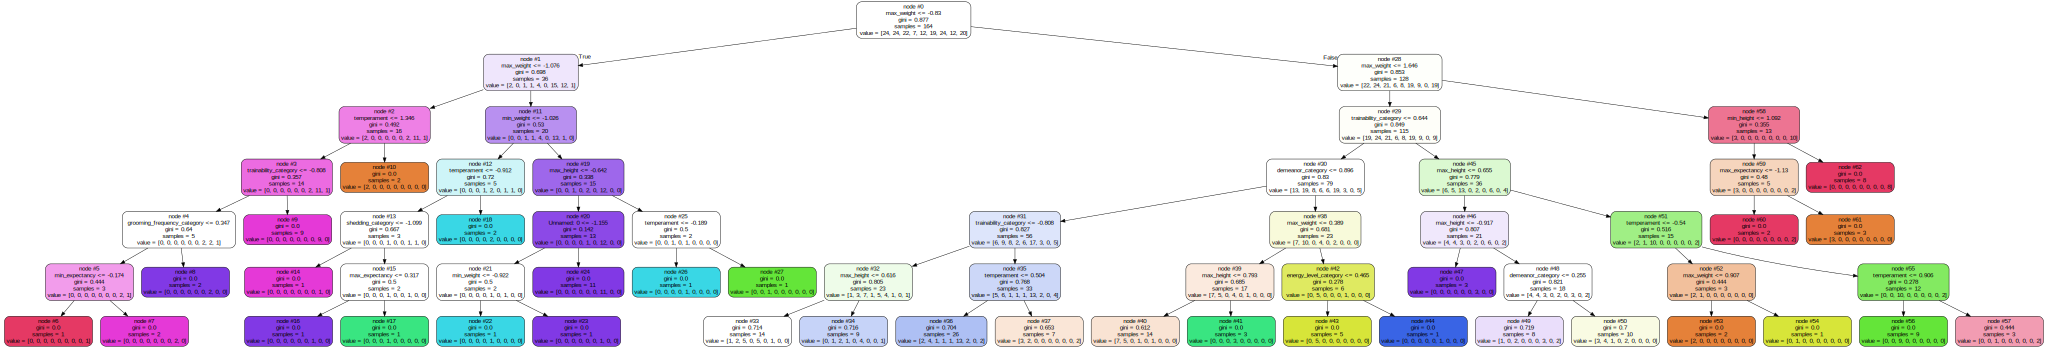

In [ ]:
#Árvore de decisão

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados desbalanceados
X = normalizado_Padronizacao.drop(['group'], axis=1) #características
y = normalizado_Padronizacao['group']                #alvo
features_names = list(features.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)
dt = DecisionTreeClassifier(max_depth=6) #profundidade da árvore = 6

model = dt.fit(X_train, y_train)

predictions = model.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))

print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)

#Plot da árvore de decisão
dot_data = tree.export_graphviz(
         dt,
         out_file=None,
         feature_names=features_names,
         filled=True, rounded=True,
         proportion=False,
         node_ids=True,
         rotate=False
        )
graph = graphviz.Source(dot_data)
graph

Confusion Matrix: 
 [[2 0 0 0 0 0 0 1 0]
 [1 1 2 0 0 1 0 0 1]
 [0 0 5 0 0 0 0 0 0]
 [4 0 1 2 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [4 0 2 0 0 0 0 0 0]
 [1 0 2 0 2 0 1 2 0]
 [0 0 0 1 0 0 0 4 0]
 [0 1 1 2 0 0 0 0 2]]
Accuracy :  36.734693877551024


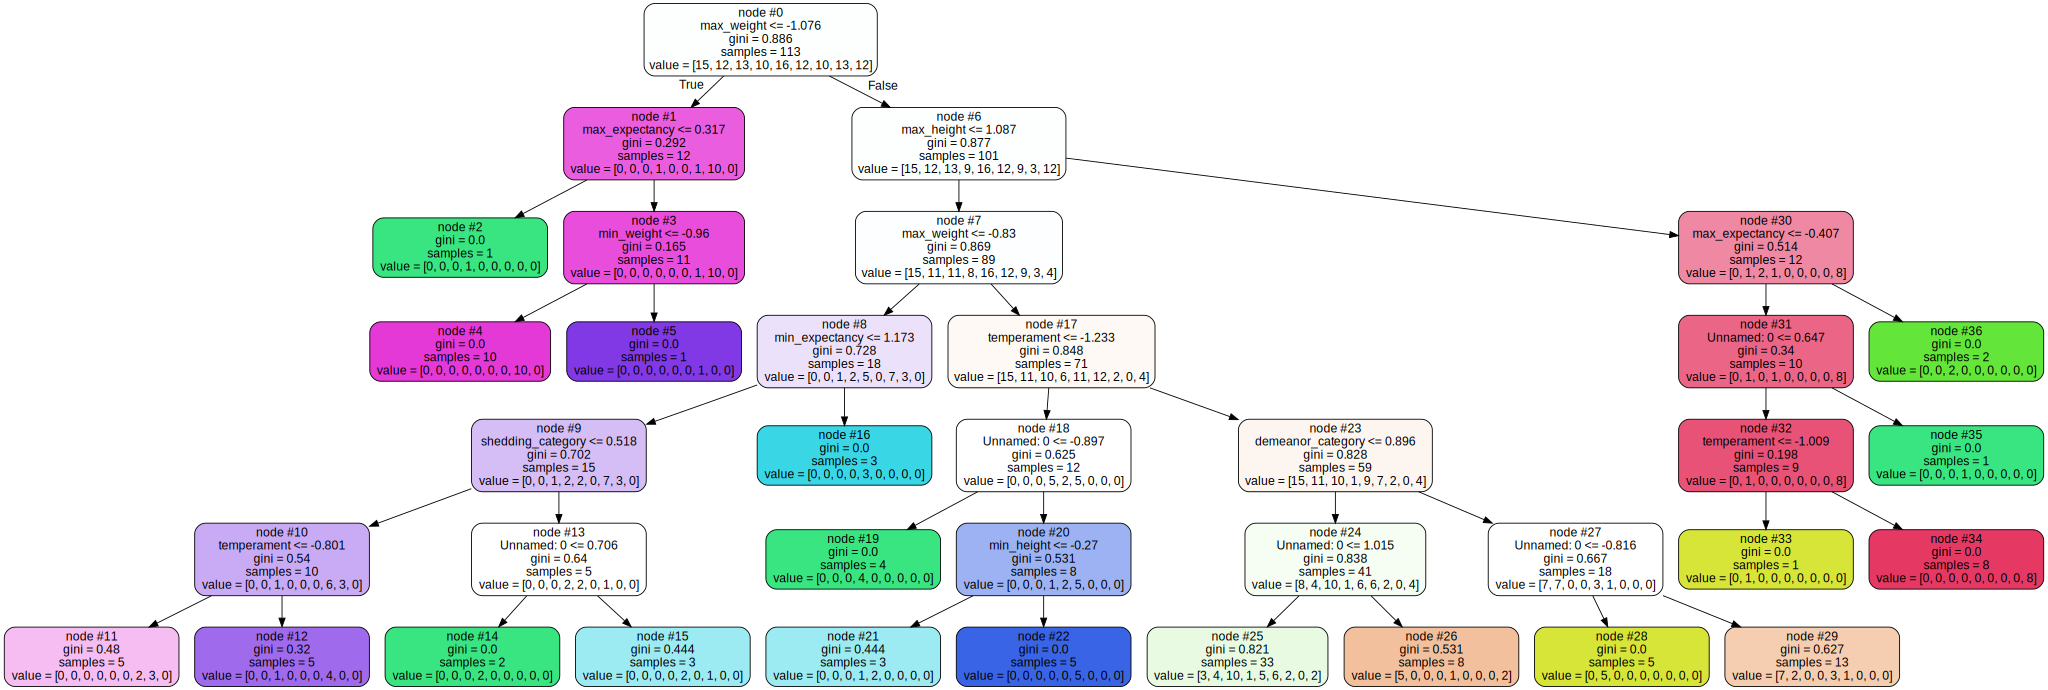

In [ ]:
#Árvore de decisão

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados balanceados
X = features  #características
y  = targets  #alvo
features_names = list(X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)
dt = DecisionTreeClassifier(max_depth=6) #profundidade da árvore = 6

#Construção do modelo
model = dt.fit(X_train, y_train)

predictions = model.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))

print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)

#Plot da árvore de decisão
dot_data = tree.export_graphviz(
         dt,
         out_file=None,
         feature_names=features_names,
         filled=True, rounded=True,
         proportion=False,
         node_ids=True,
         rotate=False
        )
graph = graphviz.Source(dot_data)
graph

Como foi perceptível ao utilizar o método *DecisionTreeClassifier* para classificação, o melhor desempenho obtido foi com uso dos dados balanceados.

In [ ]:
#Naive Bayes

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados balanceados.
#Tamanho do treinamento = 80%
#Tamanho do teste = 20%


#Usando dados desbalanceados

X = normalizado_Padronizacao.drop(['group'], axis=1)  #características
y = normalizado_Padronizacao['group']                 #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

#Construção do modelo
#Foi utilizada a função que implementa o algoritmo da Gaussiana de Naive Bayes para classificação
model = GaussianNB()

model.fit(X_train, y_train);

y_pred = model.predict(X_test)

#Métricas para avaliar o modelo

print ("Accuracy : ", metrics.accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ",metrics.confusion_matrix(y_pred, y_test))


Accuracy :  40.42553191489361
Confusion Matrix:  [[1 3 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 0 2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 5 0 0 0]
 [1 2 0 1 2 2 1 1 1]
 [0 0 0 1 3 0 1 5 0]
 [1 1 3 0 0 0 0 0 5]]


In [ ]:
#Naive Bayes

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados balanceados.
#Tamanho do treinamento = 80%
#Tamanho do teste = 20%


#Usando dados balanceados
X = features  #características
y = targets   #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

#Construção do modelo
#Foi utilizada a função que implementa o algoritmo da Gaussiana de Naive Bayes para classificação
model = GaussianNB()

model.fit(X_train, y_train);

y_pred = model.predict(X_test)

#Métricas para avaliar o modelo

print ("Accuracy : ", metrics.accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ",metrics.confusion_matrix(y_pred, y_test))

Accuracy :  45.45454545454545
Confusion Matrix:  [[0 0 1 0 0 1 0 0 0]
 [1 1 1 0 0 2 1 0 0]
 [0 0 2 1 0 0 0 0 1]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 2 0 0]
 [1 0 0 0 1 0 1 4 0]
 [0 1 0 0 0 0 0 0 3]]


Como foi perceptível ao utilizar o método *Naive Bayes* para classificação, o melhor desempenho obtido foi com uso dos dados balanceados.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centro dos clusters
[[-0.25821892  0.07293448  0.50583271  0.50377331  0.17690302  0.15493126
   0.04448787 -0.00524466  0.09471749  0.15347556 -0.23353819  0.25185384
   0.19491775]
 [ 0.3147553  -0.08607874 -0.97179908 -0.956365   -0.80470703 -0.79310016
   0.48019353  0.54368502 -0.15359183 -0.34003155  0.22983256 -0.11124554
  -0.22267261]
 [-0.13238635  0.02970372  1.22631128  1.19007405  1.69428009  1.72432664
  -1.43200667 -1.46531724  0.15237592  0.49505722  0.02954907 -0.40375486
   0.05931175]]
Previsões para o k=3
[1 0 0 2 0 2 0 1 0 0 1 1 2 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 1 2 2
 2 0 2 0 1 0 1 2 1 2 0 1 0 0 0 1 0 0 2 1 0 0 1 2 1 1 0 1 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 1 2 2 0 1 0 1 0 0 0 1 0 0 0 0 1 2 1 1 2 0 1 0 1 0 0 0 2 2 2 0 0
 0 0 1 0 0 0 0 0 2 1 1 1 0 0 1 0 2 1 2 0 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 0 1
 2 1 2 1 0 0 1 1 0 2 2 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 2 1 0 2 2 2
 1 1 1 2 0 0 1 1 2 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 2 1 1 2 1 0
 0 0 1 1 1 1 1 0 0 

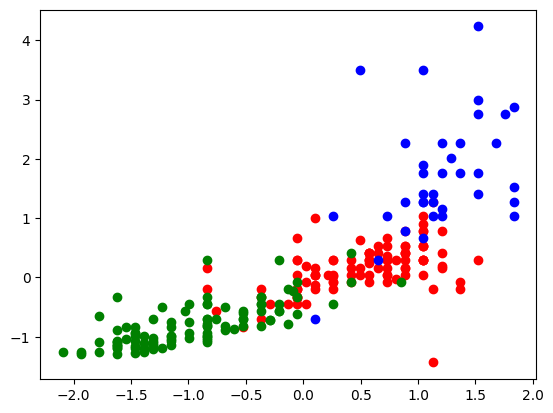

In [ ]:
#Não supervisionado

#kmeans

#Primeiro, foi definido o Kmeans = 3 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.

#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)

from sklearn.cluster import KMeans

#Iremos fazer o KMeans = 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_sem_group)
kmeans_k3_predicao = kmeans.predict(features_sem_group)

print("Centro dos clusters")
print(kmeans.cluster_centers_)
kmeans_k3_pontuacao = kmeans.score(features_sem_group)

print("Previsões para o k=3")
print(kmeans_k3_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)

label_0 = features_sem_group[kmeans_k3_predicao == 0]
label_1 = features_sem_group[kmeans_k3_predicao == 1]
label_2 = features_sem_group[kmeans_k3_predicao == 2]

plt.scatter(label_0["max_height"], label_0["max_weight"], color = 'red')
plt.scatter(label_1["max_height"], label_1["max_weight"], color = 'green')
plt.scatter(label_2["max_height"], label_2["max_weight"], color = 'blue')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centro dos clusters
[[-4.37663722e-01 -8.04762366e-02  5.71904311e-01  5.93693973e-01
   2.95970449e-01  3.17201173e-01 -1.11824101e-01 -4.99003181e-02
   4.23242806e-02  2.42293942e-01 -1.96608243e-01  3.67232549e-02
   1.80924521e-02]
 [ 3.04488599e-01 -1.62454076e-02 -1.00838984e+00 -9.24035424e-01
  -8.28642015e-01 -7.89866989e-01  5.87032899e-01  5.88610628e-01
  -1.38799177e-01 -3.20860693e-01  2.46069638e-01 -1.36378073e-03
  -2.27118492e-01]
 [-2.37616521e-02  5.92778485e-01  1.33876796e+00  1.28999522e+00
   2.15831404e+00  2.15725857e+00 -1.29379912e+00 -1.29727094e+00
   1.01997254e-01 -1.08446914e-02 -6.70326983e-02  4.76903629e-01
   2.25335772e-01]]
Previsões para o k=3
[1 0 1 1 0 0 0 1 0 0 0 1 1 0 2 0 1 0 0 0 0 0 0 1 0 0 2 1 0 1 0 0 0 0 1 1 2
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0
 2 2 2 

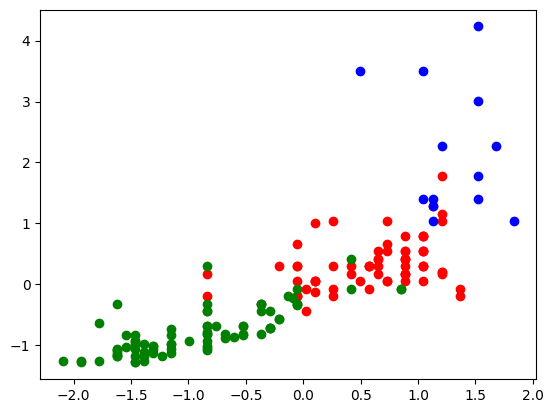

In [ ]:
#kmeans

#Primeiro, foi definido o Kmeans = 3 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.

#Usando dados balanceados
features_sem_group = features

#Iremos fazer o KMeans = 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_sem_group)
kmeans_k3_predicao = kmeans.predict(features_sem_group)

print("Centro dos clusters")
print(kmeans.cluster_centers_)
kmeans_k3_pontuacao = kmeans.score(features_sem_group)

print("Previsões para o k=3")
print(kmeans_k3_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label_0 = features_sem_group[kmeans_k3_predicao == 0]
label_1 = features_sem_group[kmeans_k3_predicao == 1]
label_2 = features_sem_group[kmeans_k3_predicao == 2]

plt.scatter(label_0["max_height"], label_0["max_weight"], color = 'red')
plt.scatter(label_1["max_height"], label_1["max_weight"], color = 'green')
plt.scatter(label_2["max_height"], label_2["max_weight"], color = 'blue')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centro dos Clusters
[[-1.32386347e-01  2.97037230e-02  1.22631128e+00  1.19007405e+00
   1.69428009e+00  1.72432664e+00 -1.43200667e+00 -1.46531724e+00
   1.52375925e-01  4.95057222e-01  2.95490736e-02 -4.03754860e-01
   5.93117453e-02]
 [ 3.38032242e-01 -4.88729831e-01 -1.06486528e+00 -1.04842691e+00
  -9.26023373e-01 -8.94050011e-01  5.44361317e-01  6.90902976e-01
   5.46995497e-01 -5.36145775e-01  1.12449394e-01 -3.16824981e-01
  -4.44966842e-01]
 [ 4.00836441e-01  3.11569232e-01 -9.26567742e-01 -9.49087089e-01
  -6.89510570e-01 -7.35210978e-01  4.18592446e-01  3.53397355e-01
  -1.18225038e+00 -1.49147569e-01  3.72907128e-01  7.87583369e-02
   1.90424178e-01]
 [-8.69308172e-01 -3.23559985e-01  5.77132625e-01  5.24829218e-01
   2.47091985e-01  1.99975865e-01 -6.86298224e-02 -5.64815800e-02
  -5.40030450e-01 -3.46013596e-01 -1.95035431e-01  2.48742908e-01
   2.52717415e-01]
 [ 2.77675848e-01  4.89380303e-01  3.12102962e-01  3.82882456e-01
   2.12603554e-02  4.79028364e-02  1.85021684e

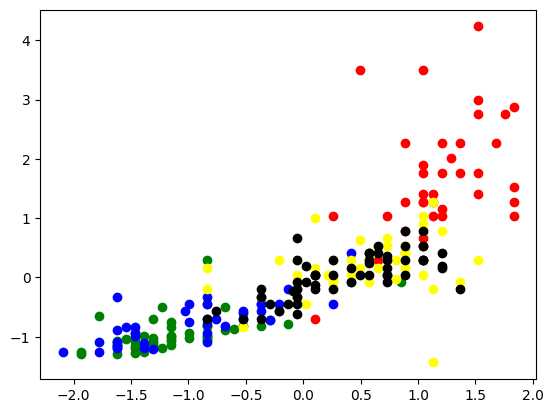

In [ ]:
#Teste com o KMeans = 5

#Primeiro, foi definido o Kmeans = 5 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.

#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)

kmeans5 = KMeans(n_clusters=5, random_state=0).fit(features_sem_group)
kmeans_k5_predicao = kmeans5.predict(features_sem_group)

print("Centro dos Clusters")
print(kmeans5.cluster_centers_)

kmeans_k5_pontuacao = kmeans5.score(features_sem_group)

print("Previsões para k=5")
print(kmeans_k5_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5_0 = features_sem_group[kmeans_k5_predicao == 0]
label5_1 = features_sem_group[kmeans_k5_predicao == 1]
label5_2 = features_sem_group[kmeans_k5_predicao == 2]
label5_3 = features_sem_group[kmeans_k5_predicao == 3]
label5_4 = features_sem_group[kmeans_k5_predicao == 4]

plt.scatter(label5_0["max_height"], label5_0["max_weight"], color = 'red')
plt.scatter(label5_1["max_height"], label5_1["max_weight"], color = 'green')
plt.scatter(label5_2["max_height"], label5_2["max_weight"], color = 'blue')
plt.scatter(label5_3["max_height"], label5_3["max_weight"], color = 'yellow')
plt.scatter(label5_4["max_height"], label5_4["max_weight"], color = 'black')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centro dos Clusters
[[ 0.30125249  0.27519094 -1.06407279 -1.18702879 -0.8010047  -0.85911846
   0.62341604  0.59705418 -1.3096948   0.04882756  0.70499074  0.16529022
   0.04882275]
 [-0.9689352  -0.6794555   0.54931223  0.49294443  0.33441883  0.32574638
  -0.26125496 -0.14193184 -0.72180602 -0.1993256  -0.05558785  0.32739536
   0.18749611]
 [ 0.30098093 -0.35834797 -1.12138627 -1.08191507 -0.94278298 -0.90016199
   0.61346509  0.71928467  0.46145588 -0.69458926  0.07488337 -0.3941676
  -0.48220588]
 [-0.2875057   0.39072319  1.19591435  1.15534209  1.56562568  1.60644569
  -1.08083384 -1.08639298  0.23122411  0.33385298 -0.2895829  -0.12373211
  -0.14790091]
 [ 0.24319862  0.453703    0.07091741  0.33296871 -0.12952029 -0.0469729
   0.32875754  0.26896182  0.55949005  0.34691257 -0.16006657  0.27639289
   0.02300369]]
Previsões para k=5
[4 3 4 0 1 4 1 0 4 4 4 4 0 4 3 4 4 4 4 1 1 1 1 2 4 1 1 4 1 0 1 4 3 4 4 2 3
 1 4 2 4 3 3 2 4 4 4 4 3 4 0 4 4 1 4 1 4 4 2 1 4 2 2 4 1 4 4 2 1 4 2 2 2

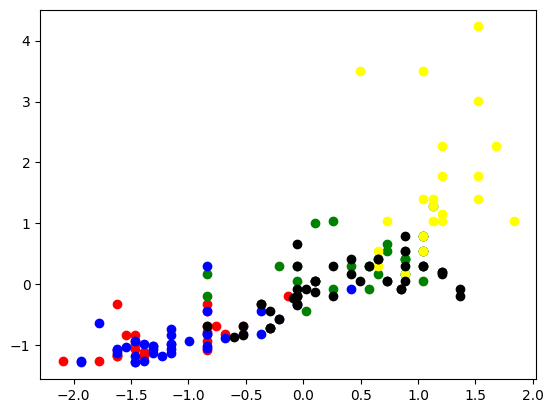

In [ ]:
#Teste com o KMeans = 5

#Primeiro, foi definido o Kmeans = 5 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.
#Usando dados balanceados
features_sem_group = features

kmeans5 = KMeans(n_clusters=5, random_state=0).fit(features_sem_group)
kmeans_k5_predicao = kmeans5.predict(features_sem_group)

print("Centro dos Clusters")
print(kmeans5.cluster_centers_)

kmeans_k5_pontuacao = kmeans5.score(features_sem_group)

print("Previsões para k=5")
print(kmeans_k5_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5_0 = features_sem_group[kmeans_k5_predicao == 0]
label5_1 = features_sem_group[kmeans_k5_predicao == 1]
label5_2 = features_sem_group[kmeans_k5_predicao == 2]
label5_3 = features_sem_group[kmeans_k5_predicao == 3]
label5_4 = features_sem_group[kmeans_k5_predicao == 4]

plt.scatter(label5_0["max_height"], label5_0["max_weight"], color = 'red')
plt.scatter(label5_1["max_height"], label5_1["max_weight"], color = 'green')
plt.scatter(label5_2["max_height"], label5_2["max_weight"], color = 'blue')
plt.scatter(label5_3["max_height"], label5_3["max_weight"], color = 'yellow')
plt.scatter(label5_4["max_height"], label5_4["max_weight"], color = 'black')

plt.show()

É perceptível que as fronteiras são relativamente mais definidas com o agrupamento sendo 3 do que com 5. Além disso, os grupos não estão muito centralizados, isso pode ter ocorrido devido aos numeros elevados dos clusters. Por fim, foi visto que ter utilizado tanto os dados balanceados como não, o comportamento não foi muito alterado.

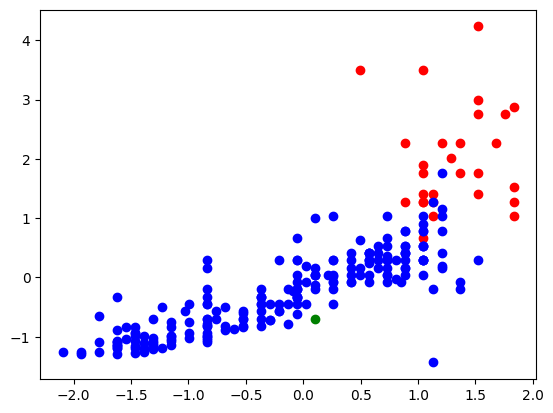

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados

#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)

#Número de grupos = 3
cluster_aglomera_3 = AgglomerativeClustering(n_clusters = 3,linkage="average")
cluster_predict_3A = cluster_aglomera_3.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
labelA_0 = features_sem_group[cluster_predict_3A == 0]
labelA_1 = features_sem_group[cluster_predict_3A == 1]
labelA_2 = features_sem_group[cluster_predict_3A == 2]

plt.scatter(labelA_0["max_height"], labelA_0["max_weight"], color = 'red')
plt.scatter(labelA_1["max_height"], labelA_1["max_weight"], color = 'green')
plt.scatter(labelA_2["max_height"], labelA_2["max_weight"], color = 'blue')

plt.show()

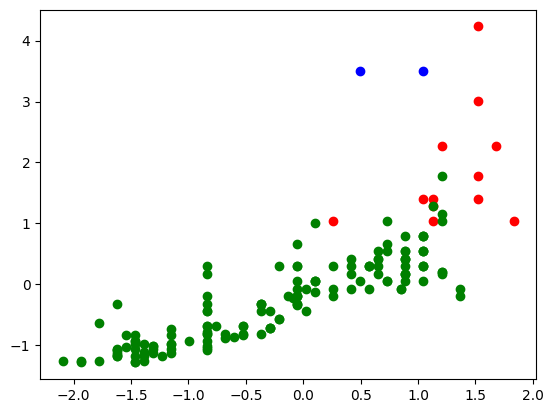

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados

#Usando dados balanceados
features_sem_group = features

#Número de grupos = 3
cluster_aglomera_3 = AgglomerativeClustering(n_clusters = 3,linkage="average")
cluster_predict_3A = cluster_aglomera_3.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
labelA_0 = features_sem_group[cluster_predict_3A == 0]
labelA_1 = features_sem_group[cluster_predict_3A == 1]
labelA_2 = features_sem_group[cluster_predict_3A == 2]

plt.scatter(labelA_0["max_height"], labelA_0["max_weight"], color = 'red')
plt.scatter(labelA_1["max_height"], labelA_1["max_weight"], color = 'green')
plt.scatter(labelA_2["max_height"], labelA_2["max_weight"], color = 'blue')

plt.show()

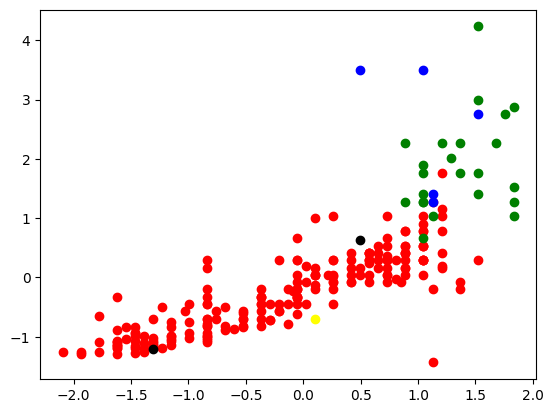

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados
#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)

#Número de grupos = 5
cluster_aglomera_5 = AgglomerativeClustering(n_clusters = 5, linkage="average")
cluster_predict_5A = cluster_aglomera_5.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5A_0 = features_sem_group[cluster_predict_5A == 0]
label5A_1 = features_sem_group[cluster_predict_5A == 1]
label5A_2 = features_sem_group[cluster_predict_5A == 2]
label5A_3 = features_sem_group[cluster_predict_5A == 3]
label5A_4 = features_sem_group[cluster_predict_5A == 4]

plt.scatter(label5A_0["max_height"], label5A_0["max_weight"], color = 'red')
plt.scatter(label5A_1["max_height"], label5A_1["max_weight"], color = 'green')
plt.scatter(label5A_2["max_height"], label5A_2["max_weight"], color = 'blue')
plt.scatter(label5A_3["max_height"], label5A_3["max_weight"], color = 'yellow')
plt.scatter(label5A_4["max_height"], label5A_4["max_weight"], color = 'black')

plt.show()

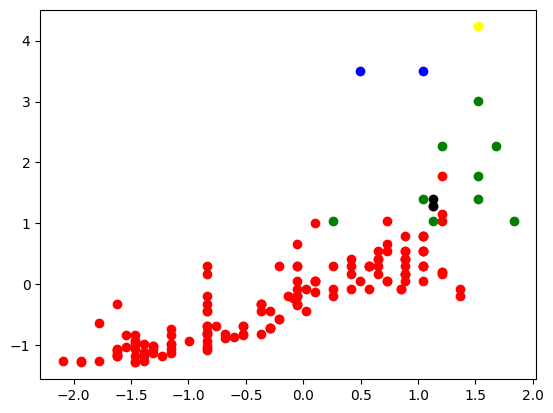

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados

#Usando dados balanceados
features_sem_group = features

#Número de grupos = 5
cluster_aglomera_5 = AgglomerativeClustering(n_clusters = 5, linkage="average")
cluster_predict_5A = cluster_aglomera_5.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5A_0 = features_sem_group[cluster_predict_5A == 0]
label5A_1 = features_sem_group[cluster_predict_5A == 1]
label5A_2 = features_sem_group[cluster_predict_5A == 2]
label5A_3 = features_sem_group[cluster_predict_5A == 3]
label5A_4 = features_sem_group[cluster_predict_5A == 4]

plt.scatter(label5A_0["max_height"], label5A_0["max_weight"], color = 'red')
plt.scatter(label5A_1["max_height"], label5A_1["max_weight"], color = 'green')
plt.scatter(label5A_2["max_height"], label5A_2["max_weight"], color = 'blue')
plt.scatter(label5A_3["max_height"], label5A_3["max_weight"], color = 'yellow')
plt.scatter(label5A_4["max_height"], label5A_4["max_weight"], color = 'black')

plt.show()

Como o algoritmo de Aglomeração possui uma natureza deterministica nos parâmetros utilizados como base para o grafico, o resultado demonstra que as fronteiras são bem mais definidas. Além disso, o fato de utilizar dados balanceados ou não, não produziu nenhum efeito tão divergente.

In [ ]:
#Correlação dos dados -> Análise dos atributos que tem correlação alta ou muito alta para poder fazer agregação de dados

In [ ]:
#Redução de dimensionalidade -> Agregação de dados

#Agregação de dados -> altura(altura mínima e máxima), peso(peso mínima e máxima) e expectativa(expectativa mínima e máxima)
aux = []
height = []
for column in df.columns:
    if column == 'min_height':
        aux = df['min_height']
        for column in df.columns:
            if column == 'max_height':
                height = (aux + df['max_height'])/2
#print(height)


aux2 = []
weight = []
for column in df.columns:
    if column == 'min_weight':
        aux2 = df['min_weight']
        for column in df.columns:
            if column == 'max_weight':
                weight = (aux2 + df['max_weight'])/2

#print(weight)


aux3 = []
expectancy = []
for column in df.columns:
    if column == 'min_expectancy':
        aux3 = df['min_expectancy']
        for column in df.columns:
            if column == 'max_expectancy':
                expectancy = (aux3 + df['max_expectancy'])//2

#print(expectancy)


df['height'] = height
df['weight'] = weight
df['expectancy'] = expectancy

#df

#Excluir as colunas -> min_height/max_height , min_weight/max_weight e min_expectancy/max_expectancy -> Correlação alta e muito alta
df = df.drop(columns=['min_height', 'max_height', 'min_weight','max_weight', 'min_expectancy', 'max_expectancy'])
df


,Unnamed: 0,temperament,group,grooming_frequency_category,shedding_category,energy_level_category,trainability_category,demeanor_category,height,weight,expectancy
0,0,72,7,0,4,4,2,3,26.035,3.855535,13.0
1,1,90,2,1,1,2,4,1,66.040,24.947580,13.0
2,2,114,6,0,2,4,1,2,58.420,27.215542,12.0
3,3,84,8,1,4,2,1,0,66.040,45.359237,11.0
4,4,29,8,0,4,2,3,2,60.960,36.287390,12.0
...,...,...,...,...,...,...,...,...,...,...,...
272,230,150,5,2,4,2,0,0,59.055,24.947580,13.0
273,231,48,0,2,4,2,3,0,55.880,19.958064,13.0
274,232,174,4,2,1,2,0,0,41.910,14.741752,15.0
275,233,21,0,4,4,2,4,4,55.880,21.545638,11.0


In [ ]:
#Preparação para a Normalização  -> Separando o atributo alvo("group") base de dados
#para poder aplicar a normalização por padronização

group = []
group = df['group']
#print(group)

df = df.drop(columns=['group'])
df['group'] = group
df


,Unnamed: 0,temperament,grooming_frequency_category,shedding_category,energy_level_category,trainability_category,demeanor_category,height,weight,expectancy,group
0,0,72,0,4,4,2,3,26.035,3.855535,13.0,7
1,1,90,1,1,2,4,1,66.040,24.947580,13.0,2
2,2,114,0,2,4,1,2,58.420,27.215542,12.0,6
3,3,84,1,4,2,1,0,66.040,45.359237,11.0,8
4,4,29,0,4,2,3,2,60.960,36.287390,12.0,8
...,...,...,...,...,...,...,...,...,...,...,...
272,230,150,2,4,2,0,0,59.055,24.947580,13.0,5
273,231,48,2,4,2,3,0,55.880,19.958064,13.0,0
274,232,174,2,1,2,0,0,41.910,14.741752,15.0,4
275,233,21,4,4,2,4,4,55.880,21.545638,11.0,0


In [ ]:
#Normalização -> Padronização -> Manual

#Xchanged = X - Média/DesvioPadrão


normalizado_Padronizacao = pd.DataFrame(columns = ['Unnamed: 0', 'temperament', "height", "weight", "expectancy",
                                          "grooming_frequency_category", "shedding_category",	"energy_level_category",
                                          "demeanor_category", "trainability_category"])
print(normalizado_Padronizacao.columns)

coluna = []
coluna_normalizada = []
coluna = df['Unnamed: 0']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('Unnamed: 0')
print(v_mean)
print(v_std)
for i in df['Unnamed: 0']:
    coluna_normalizada = (df['Unnamed: 0'] - v_mean) / (v_std)

normalizado_Padronizacao['Unnamed: 0'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df['temperament']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('temperament')
print(v_mean)
print(v_std)
for i in df['temperament']:
    coluna_normalizada = (df['temperament'] - v_mean) / (v_std)


normalizado_Padronizacao['temperament'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df['height']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('height')
print(v_mean)
print(v_std)
for i in df['height']:
    coluna_normalizada = (df['height'] - v_mean) / (v_std)


normalizado_Padronizacao['height'] = coluna_normalizada



coluna = []
coluna_normalizada = []
coluna = df['weight']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('weight')
print(v_mean)
print(v_std)
for i in df['weight']:
    coluna_normalizada = (df['weight'] - v_mean) / (v_std)


normalizado_Padronizacao['weight'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df['expectancy']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('expectancy')
print(v_mean)
print(v_std)
for i in df['expectancy']:
    coluna_normalizada = (df['expectancy'] - v_mean) / (v_std)

normalizado_Padronizacao['expectancy'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df['trainability_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('trainability_category')
print(v_mean)
print(v_std)
for i in df['trainability_category']:
    coluna_normalizada = (df['trainability_category'] - v_mean) / (v_std)

normalizado_Padronizacao['trainability_category'] = coluna_normalizada

coluna = []
coluna_normalizada = []
coluna = df['grooming_frequency_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('grooming_frequency_category')
print(v_mean)
print(v_std)
for i in df['grooming_frequency_category']:
    coluna_normalizada = (df['grooming_frequency_category'] - v_mean) / (v_std)



normalizado_Padronizacao['grooming_frequency_category'] = coluna_normalizada

coluna = []
coluna_normalizada = []
coluna = df['shedding_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('shedding_category')
print(v_mean)
print(v_std)
for i in df['shedding_category']:
    coluna_normalizada = (df['shedding_category'] - v_mean) / (v_std)


normalizado_Padronizacao['shedding_category'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df['energy_level_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('energy_level_category')
print(v_mean)
print(v_std)
for i in df['energy_level_category']:
    coluna_normalizada = (df['energy_level_category'] - v_mean) / (v_std)


normalizado_Padronizacao['energy_level_category'] = coluna_normalizada


coluna = []
coluna_normalizada = []
coluna = df['demeanor_category']
v_mean = coluna.mean() # média
v_std = coluna.std() #desvio padrão
print('demeanor_category')
print(v_mean)
print(v_std)
for i in df['demeanor_category']:
    coluna_normalizada = (df['demeanor_category'] - v_mean) / (v_std)


normalizado_Padronizacao['demeanor_category'] = coluna_normalizada


normalizado_Padronizacao


Index(['Unnamed: 0', 'temperament', 'height', 'weight', 'expectancy',
       'grooming_frequency_category', 'shedding_category',
       'energy_level_category', 'demeanor_category', 'trainability_category'],
      dtype='object')
Unnamed: 0
117.0
67.98284097231203
temperament
115.70212765957447
67.07296540157898
height
47.4561170212766
15.044470711438002
weight
21.79270065312766
15.013403530504377
expectancy
12.37872340425532
1.8504949869351501
trainability_category
1.6127659574468085
1.3771047637925313
grooming_frequency_category
2.4553191489361703
1.5693115304999057
shedding_category
2.8595744680851065
1.2375291716268295
energy_level_category
2.9957446808510637
1.0840643385376658
demeanor_category
2.1021276595744682
1.5601185252067282


,Unnamed: 0,temperament,height,weight,expectancy,grooming_frequency_category,shedding_category,energy_level_category,demeanor_category,trainability_category
0,-1.721023,-0.651561,-1.423853,-1.194743,0.335735,-1.564584,0.921534,0.926380,0.575515,0.281194
1,-1.706313,-0.383197,1.235263,0.210138,0.335735,-0.927362,-1.502651,-0.918529,-0.706438,1.733517
2,-1.691603,-0.025377,0.728765,0.361200,-0.204661,-1.564584,-0.694589,0.926380,-0.065461,-0.444967
3,-1.676894,-0.472651,1.235263,1.569700,-0.745057,-0.927362,0.921534,-0.918529,-1.347415,-0.444967
4,-1.662184,-1.292654,0.897598,0.965450,-0.204661,-1.564584,0.921534,-0.918529,-0.065461,1.007355
...,...,...,...,...,...,...,...,...,...,...
272,1.662184,0.511352,0.770973,0.210138,0.335735,-0.290139,0.921534,-0.918529,-1.347415,-1.171128
273,1.676894,-1.009380,0.559932,-0.122200,0.335735,-0.290139,0.921534,-0.918529,-1.347415,1.007355
274,1.691603,0.869171,-0.368648,-0.469644,1.416527,-0.290139,-1.502651,-0.918529,-1.347415,-1.171128
275,1.706313,-1.411927,0.559932,-0.016456,-0.745057,0.984305,0.921534,-0.918529,1.216492,1.733517


In [ ]:
#Balanceamento de dados -> Com Redução de Dimensionalidade

#Inserir novamente a coluna alvo("group") na base de dados após a normalização

normalizado_Padronizacao['group'] = group
quantidade = normalizado_Padronizacao['group'].value_counts() #cálculo das quantidades dos tipos do atributo group
print(quantidade)
y = (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 3].sample(n=9, random_state =2)).copy()
x = pd.DataFrame()

#Construção de uma nova base de dados -> Dados balanceados

x = pd.concat([(normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 0].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 1].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 2].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 3].sample(n=9, random_state =2)),
               y,
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 4].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 5].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 6].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 7].sample(n=18, random_state =2)),
               (normalizado_Padronizacao.loc[normalizado_Padronizacao['group'] == 8].sample(n=18, random_state =2))

               ])

x


0    38
2    32
1    30
8    29
5    29
6    27
7    21
4    20
3     9
Name: group, dtype: int64


,Unnamed: 0,temperament,height,weight,expectancy,grooming_frequency_category,shedding_category,energy_level_category,demeanor_category,trainability_category,group
84,-0.632513,0.839353,-0.115399,-0.348794,0.335735,-0.290139,-0.694589,0.003925,1.216492,-0.444967,0
5,-1.647475,1.212081,0.644349,0.965450,-0.745057,-0.290139,0.921534,-0.918529,-1.347415,-1.171128,0
249,1.382702,1.465536,-0.115399,-0.318581,0.335735,0.984305,0.921534,0.926380,-1.347415,1.733517,0
96,-0.500126,0.958626,-0.875147,-0.318581,1.416527,-0.290139,-0.694589,0.926380,-1.347415,1.733517,0
105,-0.382449,-0.696288,0.475516,0.210138,0.876131,-1.564584,0.921534,0.926380,1.216492,-1.171128,0
...,...,...,...,...,...,...,...,...,...,...,...
40,-1.206187,0.749898,1.572929,1.720762,-0.745057,-0.927362,0.921534,-0.918529,1.216492,0.281194,8
92,-0.544255,0.973535,1.235263,0.965450,-0.745057,-0.290139,0.113473,0.003925,-1.347415,-0.444967,8
43,-1.147348,-0.621743,0.982014,3.835637,-1.285452,-0.290139,-0.694589,-2.763438,1.216492,-1.171128,8
173,0.485417,1.689173,1.404096,2.325012,-1.825848,0.984305,0.921534,0.926380,-0.065461,0.281194,8


# Métodos Supervisionados Para Problemas de Classificação
### Com Redução de Dimensionalidade

<li> KNN </li>
<li> Random Forest </li>
<li> DecisionTreeClassifier </li>
<li> Naive Bayes </li>
</br>

### Métricas Utilizadas
<li> Acurácia </li>
<li> Matriz de Confusão </li>

In [ ]:
#Supervisionado

#KNN

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar o número de vizinhos sendo 1.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados desbalanceados

features = normalizado_Padronizacao.drop(['group'], axis=1) #características
targets = normalizado_Padronizacao['group']                 #alvo

X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.7)

#Construção do modelo

knn = neighbors.KNeighborsClassifier(n_neighbors=1) #número de vizinhos = 1
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Métricas para avaliar o modelo

print("\nK-NN")
print("Acurácia: %0.1f" % (metrics.accuracy_score(y_test, y_pred)*100))

matrizConfusao = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n",matrizConfusao)


K-NN
Acurácia: 31.0
Matriz de Confusão:
 [[5 1 1 3 0 3 0 1 2]
 [2 0 2 1 0 4 1 0 1]
 [1 2 1 0 1 2 1 0 1]
 [0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0]
 [2 0 2 0 0 5 0 0 0]
 [0 2 1 0 0 1 5 0 0]
 [0 0 0 0 0 1 3 3 0]
 [1 1 2 0 1 0 0 0 3]]


In [ ]:
#KNN

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar o número de vizinhos sendo 1.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados balanceados

features = x.drop(['group'], axis=1) #características
targets = x['group']                 #alvo

X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.7)

#Construção do modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Métricas para avaliar o modelo

print("\nK-NN")
print("Acurácia: %0.1f" % (metrics.accuracy_score(y_test, y_pred)*100))


matrizConfusao = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n",matrizConfusao)


K-NN
Acurácia: 30.6
Matriz de Confusão:
 [[0 1 2 0 1 1 0 1 0]
 [1 1 0 1 1 1 0 0 1]
 [0 0 2 1 0 1 0 1 1]
 [0 0 0 4 0 0 2 0 0]
 [1 0 0 0 2 2 0 0 1]
 [1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 1 1 1 2 0]
 [0 2 1 1 0 1 0 0 4]]


Como foi perceptível ao utilizar o método KNN para classificação, o melhor desempenho obtido foi com uso dos dados desbalanceados com o
número de vizinhos sendo um.

In [ ]:
#Random Forest

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados desbalanceados


features = normalizado_Padronizacao.drop(['group'], axis=1)  #características
targets = normalizado_Padronizacao['group']                   #alvo

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, train_size=0.7)
#Construção do modelo
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))
print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)


Confusion Matrix: 
 [[3 1 7 0 1 0 2 0 0]
 [1 3 2 0 0 0 0 0 0]
 [1 0 6 0 0 1 2 0 0]
 [1 0 0 0 0 0 1 0 0]
 [1 2 0 0 0 1 3 1 0]
 [4 1 1 1 0 1 2 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 2 7 0]
 [0 2 0 0 0 1 0 0 6]]
Accuracy :  40.845070422535215


In [ ]:
#Random Forest

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi ao
#utlizar os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados balanceados

features = x.drop(['group'], axis=1) #características
targets = x['group']                  #alvo

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, train_size=0.7)
#Construção do modelo
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))
print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)


Confusion Matrix: 
 [[1 1 0 0 0 0 0 1 0]
 [2 3 0 0 0 0 0 0 1]
 [1 0 2 0 0 1 0 0 1]
 [2 0 0 4 2 0 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [2 2 1 0 1 0 0 0 0]
 [1 0 0 1 2 1 2 1 0]
 [0 0 0 0 0 0 0 5 0]
 [0 2 1 0 0 0 0 0 3]]
Accuracy :  42.857142857142854


Como foi perceptível ao utilizar o método Random Forest para classificação, o melhor desempenho obtido foi com uso dos dados balanceados.

Confusion Matrix: 
 [[1 1 3 0 1 1 2 0 5]
 [1 2 0 0 0 0 0 0 3]
 [4 1 3 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 2 3 1 1]
 [2 0 0 2 0 2 3 0 1]
 [0 0 0 0 0 0 2 1 0]
 [0 0 0 0 0 0 2 7 0]
 [3 1 1 1 0 1 0 0 2]]
Accuracy :  26.76056338028169


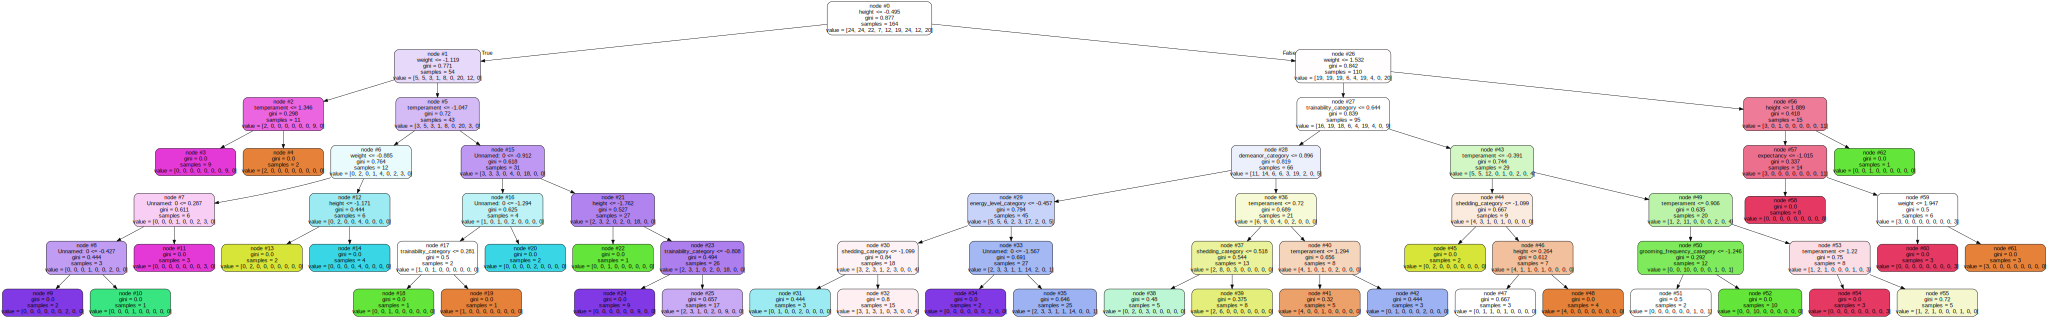

In [ ]:
#Árvore de decisão

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados desbalanceados
features = normalizado_Padronizacao.drop(['group'], axis=1) #características
targets = normalizado_Padronizacao['group']                 #alvo

features_names = list(features.columns)

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, train_size=0.7)
dt = DecisionTreeClassifier(max_depth=6)

#Construção do modelo
model = dt.fit(X_train, y_train)

predictions = model.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))

print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)

#Plot da árvore de decisão

dot_data = tree.export_graphviz(
         dt,
         out_file=None,
         feature_names=features_names,
         filled=True, rounded=True,
         proportion=False,
         node_ids=True,
         rotate=False
        )
graph = graphviz.Source(dot_data)
graph

Confusion Matrix: 
 [[1 0 0 1 0 1 0 0 0]
 [3 0 1 0 1 1 0 0 0]
 [1 0 0 0 0 1 0 0 3]
 [1 0 2 2 2 1 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [4 0 2 0 0 0 0 0 0]
 [1 0 1 0 0 1 3 2 0]
 [0 0 0 0 0 0 0 5 0]
 [0 1 1 1 0 0 0 0 3]]
Accuracy :  30.612244897959183


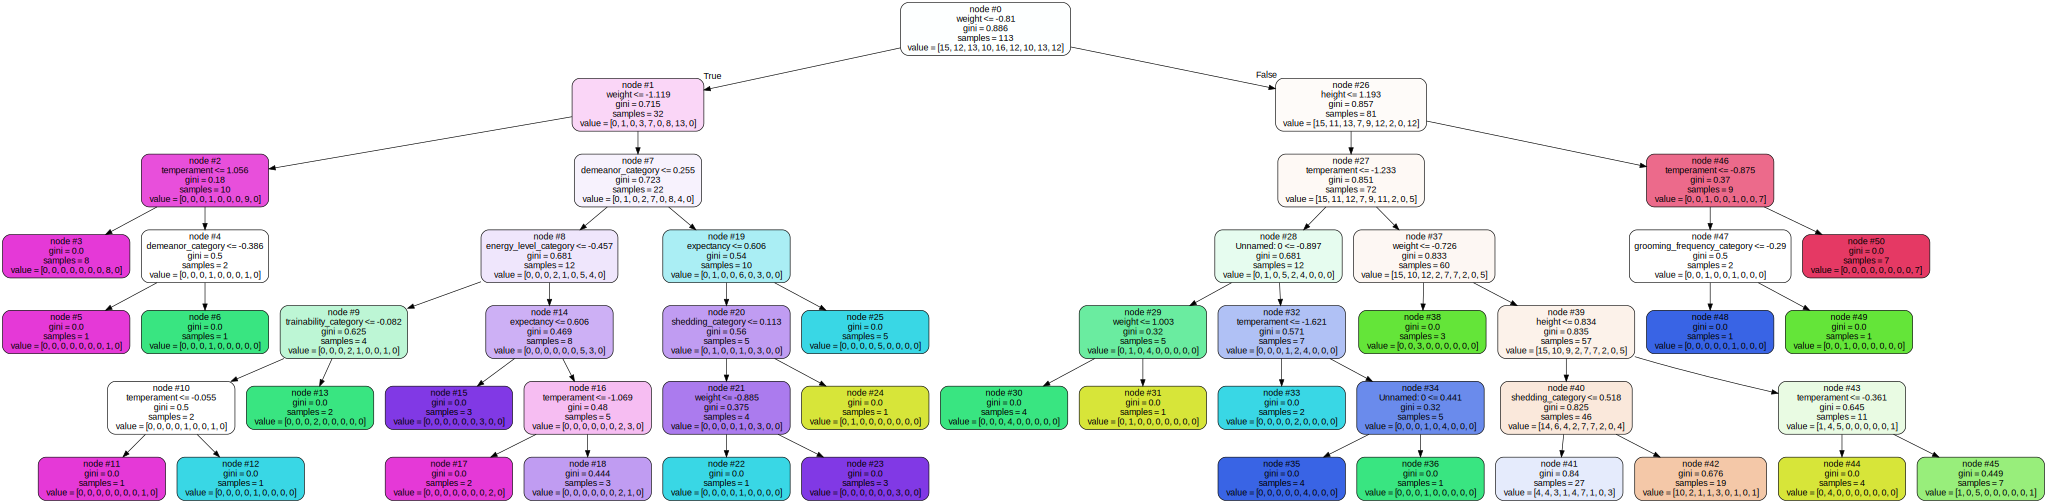

In [ ]:
#Árvore de decisão

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados balanceados.
#Tamanho do treinamento = 70%
#Tamanho do teste = 30%

#Usando dados balanceados
features = x.drop(['group'], axis=1)
targets = x['group']
features_names = list(features.columns)


X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, train_size=0.7)
dt = DecisionTreeClassifier(max_depth=6)

model = dt.fit(X_train, y_train)

predictions = model.predict(X_test)

#Métricas para avaliar o modelo

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predictions))

print ("Accuracy : ", metrics.accuracy_score(y_test,predictions)*100)

#Plot da árvore de decisão

dot_data = tree.export_graphviz(
         dt,
         out_file=None,
         feature_names=features_names,
         filled=True, rounded=True,
         proportion=False,
         node_ids=True,
         rotate=False
        )
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Naive Bayes

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados desbalanceados.
#Tamanho do treinamento = 80%
#Tamanho do teste = 20%

#Usando dados desbalanceados
X = normalizado_Padronizacao.drop(['group'], axis=1) #características
y = normalizado_Padronizacao['group']                #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)


#Construção do modelo
#Foi utilizada a função que implementa o algoritmo da Gaussiana de Naive Bayes para classificação
model = GaussianNB()

model.fit(X_train, y_train);

y_pred = model.predict(X_test)
#Métricas para avaliar o modelo

print ("Accuracy : ", metrics.accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ",metrics.confusion_matrix(y_pred, y_test))


Accuracy :  38.297872340425535
Confusion Matrix:  [[2 3 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [2 0 2 0 0 1 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 3 0 0 0]
 [1 0 0 1 0 2 1 1 1]
 [0 0 0 1 3 0 1 5 0]
 [1 1 3 0 0 0 0 0 5]]


In [ ]:
#Naive Bayes

#Variações de parâmetros -> uso de dados desbalanceados e balanceados(X e y)
#Ao analisar a validação do modelo com acurácia e a matriz
#de confusão, foi visto que o melhor desempenho foi obtido ao utilizar
#os dados desbalanceados.
#Tamanho do treinamento = 80%
#Tamanho do teste = 20%

#Usando dados balanceados
X = x.drop(['group'], axis=1)   #características
y = x['group']                  #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size=0.8)


#Construção do modelo
#Foi utilizada a função que implementa o algoritmo da Gaussiana de Naive Bayes para classificação
model = GaussianNB()

model.fit(X_train, y_train);

y_pred = model.predict(X_test)
#Métricas para avaliar o modelo

print ("Accuracy : ", metrics.accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ",metrics.confusion_matrix(y_pred, y_test))



Accuracy :  36.36363636363637
Confusion Matrix:  [[3 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 2 0 0 0]
 [0 1 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1]
 [2 3 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 2 1]
 [0 0 0 0 1 0 0 3 0]
 [0 0 2 0 0 0 0 0 2]]


Como foi perceptível ao utilizar o método Naive Bayes para classificação, o melhor desempenho obtido foi com uso dos dados desbalanceados.

# Métodos Não Supervisionados

<li> KMeans </li>
<li> Hierárquico do Tipo Ligação Média  </li>
</br>

### Métricas Utilizadas
<li> Gráficos </li>


Centro dos clusters
[[-0.54388259  0.09465073  0.98735695  1.0342885  -0.82030155  0.01637247
   0.24644469 -0.12451769 -0.00866605  0.14331562]
 [-0.1719891  -0.20352232 -0.79235357 -0.70669546  0.47429842 -0.36366506
  -0.76710762  0.33506284 -0.30377341 -0.3425595 ]
 [ 0.72284454  0.10765812 -0.2076618  -0.34085314  0.35651982  0.34708268
   0.51750338 -0.20894877  0.31255057  0.1974065 ]]
Previsões para o k=3
[1 0 0 0 0 0 0 2 0 0 1 1 0 0 2 0 1 1 0 1 1 2 1 0 1 0 0 0 2 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1
 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 2 2 2 0 1 1 0 0 1 2 1 0 0 2 0 0 0 0 1
 0 2 1 0 0 2 0 2 0 2 2 1 2 2 2 2 0 1 0 0 1 1 2 2 0 1 1 1 1 1 0 1 1 1 1 2 2
 0 2 0 2 2 2 2 2 2 0 0 2 1 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 1 2 1 0 2 2 0 0 0
 1 1 1 0 2 2 2 2 0 1 1 2 2 1 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 0 2 2 0 2 2
 2 2 1 2 2 2 1 2 2 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


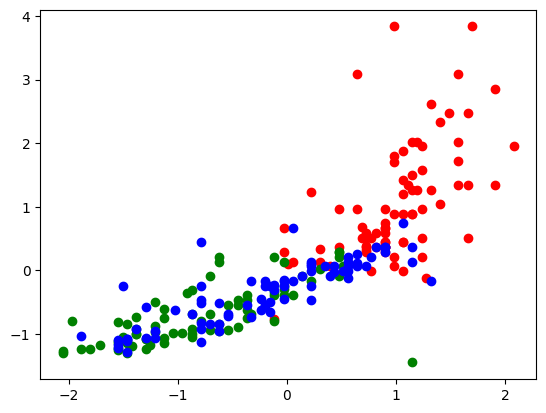

In [ ]:
#Não supervisionado

#kmeans

#Primeiro, foi definido o Kmeans = 3 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.

#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)


#Iremos fazer o KMeans = 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_sem_group)
kmeans_k3_predicao = kmeans.predict(features_sem_group)

print("Centro dos clusters")
print(kmeans.cluster_centers_)
kmeans_k3_pontuacao = kmeans.score(features_sem_group)

print("Previsões para o k=3")
print(kmeans_k3_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label_0 = features_sem_group[kmeans_k3_predicao == 0]
label_1 = features_sem_group[kmeans_k3_predicao == 1]
label_2 = features_sem_group[kmeans_k3_predicao == 2]

plt.scatter(label_0["height"], label_0["weight"], color = 'red')
plt.scatter(label_1["height"], label_1["weight"], color = 'green')
plt.scatter(label_2["height"], label_2["weight"], color = 'blue')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centro dos clusters
[[ 0.30392617 -0.04839871 -1.0464622  -0.83885804  0.70129732 -0.23391395
  -0.44504077  0.5058491  -0.03718308 -0.21003235]
 [ 0.12305141  0.72036629  0.55749707  0.44283185 -0.25662174  0.66569373
   0.33102759 -0.03155368 -0.10244091 -0.05395698]
 [-0.7908158  -0.79319779  0.52475866  0.44680208 -0.17892745 -0.60875048
   0.09423294 -0.65497072  0.3923792   0.0737197 ]]
Previsões para o k=3
[0 1 1 0 2 1 1 0 2 1 1 1 0 1 2 1 0 1 1 2 2 2 2 0 2 2 2 1 2 0 2 2 2 1 1 0 1
 2 1 0 1 1 1 0 1 1 1 1 2 2 2 1 1 2 0 2 1 1 0 2 2 0 0 0 2 1 1 0 2 2 0 0 0 1
 0 1 2 2 2 0 0 1 1 0 0 0 0 0 0 1 1 0 2 2 0 0 2 0 2 1 1 1 1 2 1 1 0 2 0 2 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 1 1
 1 1 1 2 2 1 0 1 0 2 1 2 1 1]


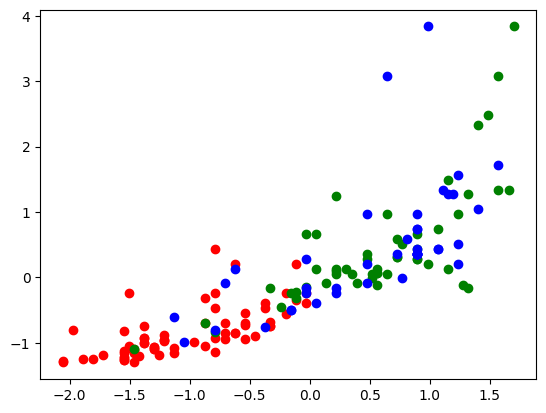

In [ ]:
#kmeans

#Primeiro, foi definido o Kmeans = 3 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.

#Usando dados balanceados
features_sem_group = x.drop('group',axis=1)

from sklearn.cluster import KMeans

#Iremos fazer o KMeans = 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_sem_group)
kmeans_k3_predicao = kmeans.predict(features_sem_group)

print("Centro dos clusters")
print(kmeans.cluster_centers_)
kmeans_k3_pontuacao = kmeans.score(features_sem_group)

print("Previsões para o k=3")
print(kmeans_k3_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label_0 = features_sem_group[kmeans_k3_predicao == 0]
label_1 = features_sem_group[kmeans_k3_predicao == 1]
label_2 = features_sem_group[kmeans_k3_predicao == 2]

plt.scatter(label_0["height"], label_0["weight"], color = 'red')
plt.scatter(label_1["height"], label_1["weight"], color = 'green')
plt.scatter(label_2["height"], label_2["weight"], color = 'blue')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centro dos Clusters
[[-0.17324633 -0.12698026 -0.96894257 -0.79079121  0.565904   -0.41994393
  -0.87415854  0.73847242 -0.35034012 -0.35083484]
 [-0.83354367 -0.59973399  0.69560137  0.30904749 -0.05026175 -0.60875048
  -0.09816272 -0.4792651   0.59077682  0.33306298]
 [ 0.86467898 -0.19434747 -0.59833114 -0.6048445   0.44381455  0.18777715
   0.35589103 -0.4573019  -0.05477853 -0.05768089]
 [-0.11145346  0.97124118  0.51610057  0.33883115 -0.16309168  0.677948
   0.28440864  0.19905994  0.37829179  0.22533577]
 [-0.06374157 -0.25177525  1.19149186  1.79237706 -1.72577513  0.06387285
   0.5623957  -0.0985696  -0.82513785 -0.12222855]]
Previsões para k=5
[0 1 1 4 1 4 3 3 1 3 0 0 3 1 1 3 1 0 3 0 1 3 1 3 1 3 1 1 1 1 1 1 3 1 0 3 1
 4 3 4 0 0 1 0 4 0 4 1 0 1 1 1 0 3 0 4 0 1 1 2 4 2 0 1 0 0 3 3 1 0 3 0 1 0
 3 1 3 0 0 0 4 4 3 0 3 0 1 1 3 0 3 1 3 3 2 4 2 0 4 3 0 1 0 3 1 3 4 3 4 1 1
 3 3 0 1 1 2 1 3 4 2 2 0 2 2 0 1 3 0 3 3 0 0 2 3 4 0 0 0 0 0 4 0 2 0 0 3 2
 4 2 4 2 2 3 2 2 2 4 4 2 2 2 2 2 2 3 

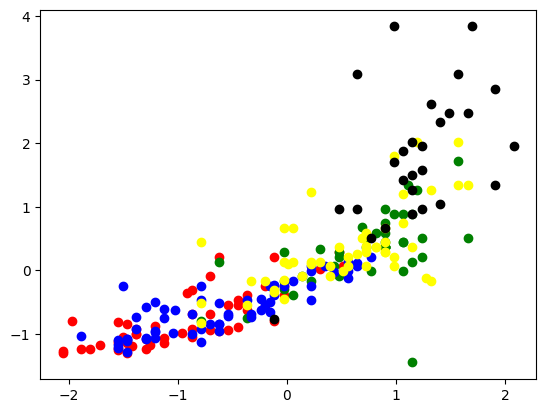

In [ ]:
#Teste com o KMeans = 5

#Primeiro, foi definido o Kmeans = 5 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.


#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(features_sem_group)
kmeans_k5_predicao = kmeans5.predict(features_sem_group)

print("Centro dos Clusters")
print(kmeans5.cluster_centers_)

kmeans_k5_pontuacao = kmeans5.score(features_sem_group)

print("Previsões para k=5")
print(kmeans_k5_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5_0 = features_sem_group[kmeans_k5_predicao == 0]
label5_1 = features_sem_group[kmeans_k5_predicao == 1]
label5_2 = features_sem_group[kmeans_k5_predicao == 2]
label5_3 = features_sem_group[kmeans_k5_predicao == 3]
label5_4 = features_sem_group[kmeans_k5_predicao == 4]

plt.scatter(label5_0["height"], label5_0["weight"], color = 'red')
plt.scatter(label5_1["height"], label5_1["weight"], color = 'green')
plt.scatter(label5_2["height"], label5_2["weight"], color = 'blue')
plt.scatter(label5_3["height"], label5_3["weight"], color = 'yellow')
plt.scatter(label5_4["height"], label5_4["weight"], color = 'black')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centro dos Clusters
[[ 0.27527955  0.42349425 -1.04699424 -0.76556418  0.56733362 -1.15494086
  -0.17512098  0.7616558   0.27791903  0.04778538]
 [-0.03539496 -0.36549193 -0.85799949 -0.754774    0.6903702   0.42673544
  -1.25013172  0.58045938 -0.44604153 -0.55842952]
 [-0.95612362 -0.7256807   0.62384743  0.5985839  -0.32817967 -0.79991711
   0.13655998 -0.62861487  0.31912469  0.0737197 ]
 [-0.12213421  0.85697255  0.86050569  0.80614766 -0.6304271   0.65603885
   0.33385298  0.115738   -0.02661439  0.01713572]
 [ 0.72855755 -0.06440411 -0.39968364 -0.50629845  0.62182733  0.53450095
   0.58880295 -0.48443291  0.14191342 -0.01781322]]
Previsões para k=5
[0 3 4 0 2 4 3 0 4 4 3 4 0 3 2 3 0 4 3 2 2 2 2 1 4 2 2 4 2 0 1 2 2 4 4 1 3
 2 3 1 3 3 3 4 4 3 3 4 2 2 2 3 4 2 0 2 3 3 4 2 4 1 4 0 2 3 3 4 2 4 1 4 1 3
 4 4 2 2 2 0 1 4 1 4 1 1 0 0 1 4 1 0 4 2 1 0 2 0 2 3 4 3 3 2 1 3 4 2 0 2 1
 0 4 1 1 1 1 0 4 3 1 1 0 1 1 0 1 0 0 0 1 0 4 0 1 0 0 4 0 1 1 4 1 1 2 2 3 3
 3 3 3 2 2 3 0 4 1 2 3 2 3 3]


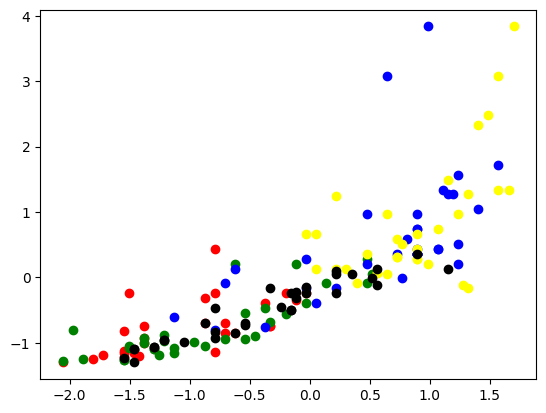

In [ ]:
#Teste com o KMeans = 5

#Primeiro, foi definido o Kmeans = 5 (número de clusters ou agrupamentos)
#Depois, foi preciso definir, aleatoriamente, um centroide para cada cluster.

#Usando dados balanceados
features_sem_group = x.drop('group',axis=1)
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(features_sem_group)
kmeans_k5_predicao = kmeans5.predict(features_sem_group)

print("Centro dos Clusters")
print(kmeans5.cluster_centers_)

kmeans_k5_pontuacao = kmeans5.score(features_sem_group)

print("Previsões para k=5")
print(kmeans_k5_predicao)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5_0 = features_sem_group[kmeans_k5_predicao == 0]
label5_1 = features_sem_group[kmeans_k5_predicao == 1]
label5_2 = features_sem_group[kmeans_k5_predicao == 2]
label5_3 = features_sem_group[kmeans_k5_predicao == 3]
label5_4 = features_sem_group[kmeans_k5_predicao == 4]

plt.scatter(label5_0["height"], label5_0["weight"], color = 'red')
plt.scatter(label5_1["height"], label5_1["weight"], color = 'green')
plt.scatter(label5_2["height"], label5_2["weight"], color = 'blue')
plt.scatter(label5_3["height"], label5_3["weight"], color = 'yellow')
plt.scatter(label5_4["height"], label5_4["weight"], color = 'black')

plt.show()

É perceptível que as fronteiras não estão tão bem definidas depois de fazer a redução de dimensionalidade. Além disso, os grupos não estão muito centralizados, isso pode ter ocorrido devido aos numeros elevados dos clusters. Por fim, foi visto que ter utilizado tanto os dados balanceados como não, o comportamento não foi muito alterado.

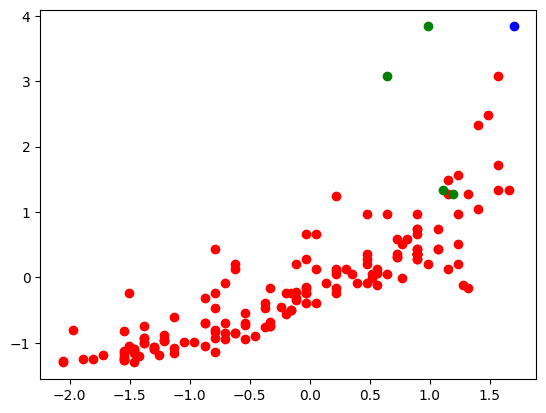

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados
#Usando dados balanceados
features_sem_group = x.drop('group',axis=1)

#Número de grupos = 3

cluster_aglomera_3 = AgglomerativeClustering(n_clusters = 3,linkage="average")
cluster_predict_3A = cluster_aglomera_3.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
labelA_0 = features_sem_group[cluster_predict_3A == 0]
labelA_1 = features_sem_group[cluster_predict_3A == 1]
labelA_2 = features_sem_group[cluster_predict_3A == 2]

plt.scatter(labelA_0["height"], labelA_0["weight"], color = 'red')
plt.scatter(labelA_1["height"], labelA_1["weight"], color = 'green')
plt.scatter(labelA_2["height"], labelA_2["weight"], color = 'blue')

plt.show()

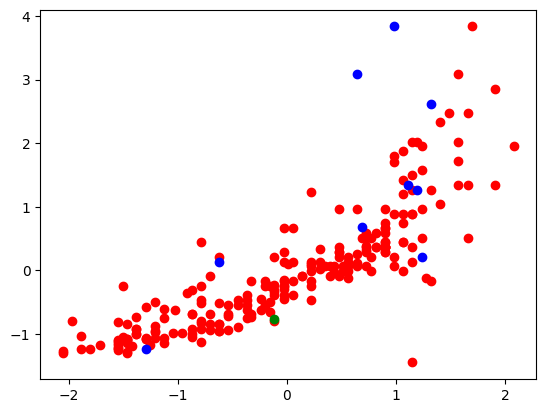

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados
#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)

#Número de grupos = 3

cluster_aglomera_3 = AgglomerativeClustering(n_clusters = 3,linkage="average")
cluster_predict_3A = cluster_aglomera_3.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
labelA_0 = features_sem_group[cluster_predict_3A == 0]
labelA_1 = features_sem_group[cluster_predict_3A == 1]
labelA_2 = features_sem_group[cluster_predict_3A == 2]

plt.scatter(labelA_0["height"], labelA_0["weight"], color = 'red')
plt.scatter(labelA_1["height"], labelA_1["weight"], color = 'green')
plt.scatter(labelA_2["height"], labelA_2["weight"], color = 'blue')

plt.show()

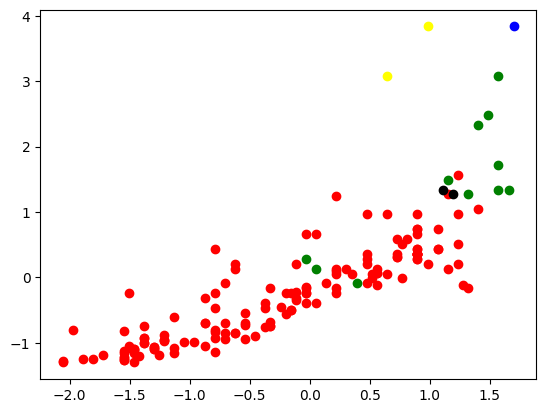

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados
#Usando dados balanceados
features_sem_group = x.drop('group',axis=1)

#Número de grupos = 5

cluster_aglomera_5 = AgglomerativeClustering(n_clusters = 5, linkage="average")
cluster_predict_5A = cluster_aglomera_5.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5A_0 = features_sem_group[cluster_predict_5A == 0]
label5A_1 = features_sem_group[cluster_predict_5A == 1]
label5A_2 = features_sem_group[cluster_predict_5A == 2]
label5A_3 = features_sem_group[cluster_predict_5A == 3]
label5A_4 = features_sem_group[cluster_predict_5A == 4]

plt.scatter(label5A_0["height"], label5A_0["weight"], color = 'red')
plt.scatter(label5A_1["height"], label5A_1["weight"], color = 'green')
plt.scatter(label5A_2["height"], label5A_2["weight"], color = 'blue')
plt.scatter(label5A_3["height"], label5A_3["weight"], color = 'yellow')
plt.scatter(label5A_4["height"], label5A_4["weight"], color = 'black')

plt.show()

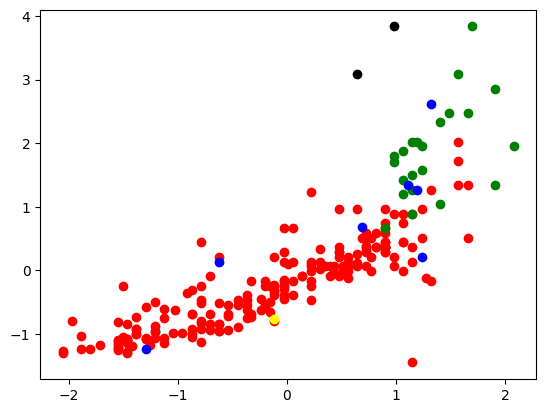

In [ ]:
# Hierárquico --> Ligação média  Escolhendo os links entre os blocos como Average, usando a distância média entre os dois grupos observados
#Usando dados desbalanceados
features_sem_group = normalizado_Padronizacao.drop('group',axis=1)

#Número de grupos = 5

cluster_aglomera_5 = AgglomerativeClustering(n_clusters = 5, linkage="average")
cluster_predict_5A = cluster_aglomera_5.fit_predict(features_sem_group)

#Plotando Grafico 2D Baseado em weight(Y) e height(X)
label5A_0 = features_sem_group[cluster_predict_5A == 0]
label5A_1 = features_sem_group[cluster_predict_5A == 1]
label5A_2 = features_sem_group[cluster_predict_5A == 2]
label5A_3 = features_sem_group[cluster_predict_5A == 3]
label5A_4 = features_sem_group[cluster_predict_5A == 4]

plt.scatter(label5A_0["height"], label5A_0["weight"], color = 'red')
plt.scatter(label5A_1["height"], label5A_1["weight"], color = 'green')
plt.scatter(label5A_2["height"], label5A_2["weight"], color = 'blue')
plt.scatter(label5A_3["height"], label5A_3["weight"], color = 'yellow')
plt.scatter(label5A_4["height"], label5A_4["weight"], color = 'black')

plt.show()

Como o algoritmo de Aglomeração possui uma natureza deterministica nos parâmetros utilizados como base para o grafico, o resultado demonstra que as fronteiras são bem mais definidas. Além disso, o fato de utilizar dados balanceados apresentou uma melhora relativa nas identificações das fronteiras.